In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [63]:
data_path="./mask_word/"

binary_threshold = 220
block=2
remove_smallest_roi = False
#unit = pixel
center_distance_ratio=1/4

In [64]:
def cv2_imread(file_path):
    import cv2
    import numpy as np
    img=cv2.imdecode(np.fromfile(file_path,dtype=np.uint8),-1)
    return img

In [65]:
def split_by_black(imgs):
    img = cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB)
    # plt.imshow(img)
    # plt.show()
    # print(img[:,:,0].shape)
    top=0
    bot=0
    left=0
    right=0

#=============== V1 由外向內 ===================

#     for y in range(int(img[:,:,0].shape[0]/2-img[:,:,0].shape[0]*center_distance_ratio)):
#         if img[y,:,0].mean()<block:
#             bot=y
#             break
#     for y in range(img[:,:,0].shape[0]-1,int(img[:,:,0].shape[0]/2+img[:,:,0].shape[0]*center_distance_ratio),-1):
#         if img[y,:,0].mean()<block:
#             top=y
#             break
#     for x in range(int(img[:,:,0].shape[1]/2-img[:,:,0].shape[1]*center_distance_ratio)):
#         if img[:,x,0].mean()<block:
#             left=x
#             break
#     for x in range(img[:,:,0].shape[1]-1,int(img[:,:,0].shape[1]/2+img[:,:,0].shape[1]*center_distance_ratio),-1):
#         if img[:,x,0].mean()<block:
#             right=x
#             break

#     if top==0:
#         top=img[:,:,0].shape[0]
#     if right==0:
#         right=img[:,:,0].shape[1]

#=============== V1 由外向內 ===================


#=============== V2 新增每上下左右都承接前面一次結果 ===================

#     for y in range(img[:,:,0].shape[0]-1,int(img[:,:,0].shape[0]/2+img[:,:,0].shape[0]*center_distance_ratio),-1):
#         if img[y,:,0].mean()<block:
#             top=y
#             break
#     if top==0:
#         top=img[:,:,0].shape[0]


#     for y in range(int(img[:,:,0].shape[0]/2-img[:,:,0].shape[0]*center_distance_ratio)):
#         if img[y,:,0].mean()<block:
#             bot=y
#             break


#     for x in range(img[bot:top,:,0].shape[1]-1,int(img[bot:top,:,0].shape[1]/2+img[bot:top,:,0].shape[1]*center_distance_ratio),-1):
#         if img[bot:top,x,0].mean()<block:
#             right=x
#             break

#     if right==0:
#         right=img[bot:top,:,0].shape[1]


#     for x in range(int(img[bot:top,:,0].shape[1]/2-img[bot:top,:,0].shape[1]*center_distance_ratio)):
#         if img[bot:top,x,0].mean()<block:
#             left=x
#             break

#=============== V2 新增每上下左右都承接前面一次結果 ===================

#=============== V3 由內向外 ===================
    for y in range(int(img[:,:,0].shape[0]/2+img[:,:,0].shape[0]*center_distance_ratio),img[:,:,0].shape[0]-1):
        if img[y,:,0].mean()<block:
            top=y
            break
    if top==0:
        top=img[:,:,0].shape[0]


    for y in range(int(img[:,:,0].shape[0]/2-img[:,:,0].shape[0]*center_distance_ratio),0,-1):
        if img[y,:,0].mean()<block:
            bot=y
            break


    for x in range(int(img[bot:top,:,0].shape[1]/2+img[bot:top,:,0].shape[1]*center_distance_ratio),img[bot:top,:,0].shape[1]-1):
        if img[bot:top,x,0].mean()<block:
            right=x
            break

    if right==0:
        right=img[bot:top,:,0].shape[1]


    for x in range(int(img[bot:top,:,0].shape[1]/2-img[bot:top,:,0].shape[1]*center_distance_ratio),0,-1):
        if img[bot:top,x,0].mean()<block:
            left=x
            break

#=============== V3 由內向外 ===================

#     print(bot)
#     print(top)
#     print(img[:,:,0].shape[0])
#     print("")
#     print(left)
#     print(right)
#     print(img[:,:,0].shape[1])
    
    return left,right,bot,top

In [66]:
def split_by_contour(img):
    ret, th1 = cv2.threshold(img, binary_threshold, 255, cv2.THRESH_BINARY)

    gray = cv2.cvtColor(th1,cv2.COLOR_BGR2GRAY)

    contours, hierarchy = cv2.findContours(gray, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    contour_x = []
    contour_y = []
    contour_w = []
    contour_h = []
    contour_roi = []
    contour_cnt = len(contours)
    for i in range(contour_cnt):
        x,y,w,h = cv2.boundingRect(contours[i])
        size = w*h
        contour_x.append(x)
        contour_y.append(y)
        contour_w.append(w)
        contour_h.append(h)
        contour_roi.append(size)

    min_roi_index = contour_roi.index(min(contour_roi))

    if len(contour_roi) > 1 and remove_smallest_roi:
        del contour_x[min_roi_index]
        del contour_y[min_roi_index]
        del contour_w[min_roi_index]
        del contour_h[min_roi_index]
        del contour_roi[min_roi_index]

    bounded_x = min(contour_x)
    bounded_y = min(contour_y)

    right_x = np.array(contour_x) + np.array(contour_w)
    down_y = np.array(contour_y) + np.array(contour_h)

    bounded_w = max(right_x)
    bounded_h = max(down_y)

    return bounded_x, bounded_w, bounded_h, bounded_y
#     plt.imshow(img[bounded_y:bounded_h,bounded_x:bounded_w])
#     plt.show()

word            : 0 56001_禎.png
img size        : 74 67
split_by_black  : 5 0 55 53
split_by_contour: 8 0 50 67
crop area       : 8 0 50 53


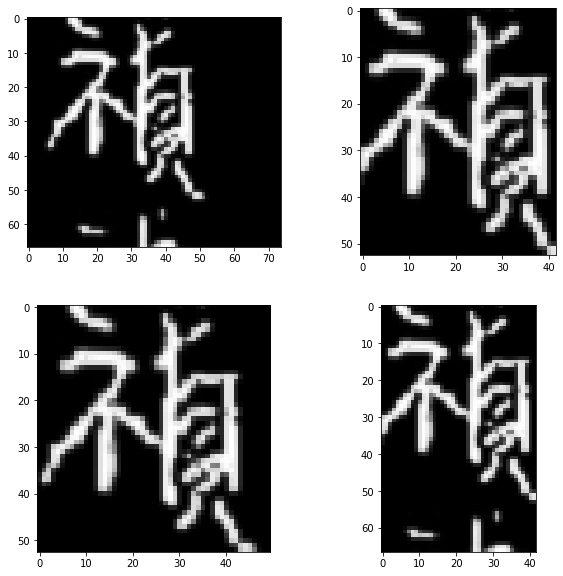

word            : 1 56002_璟.png
img size        : 54 67
split_by_black  : 10 15 54 67
split_by_contour: 13 1 54 63
crop area       : 13 15 54 63


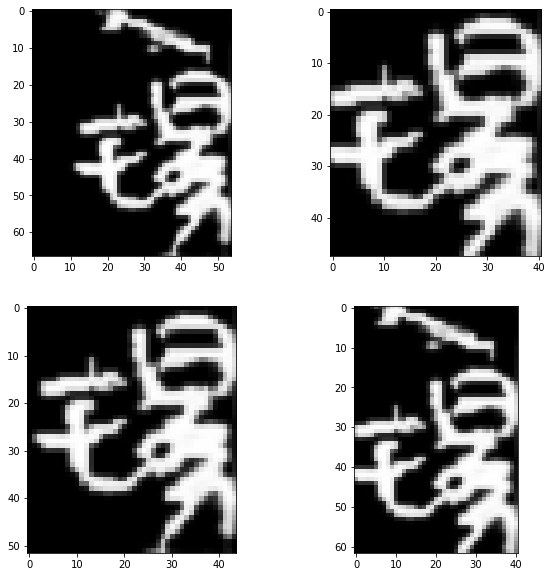

word            : 2 56009_清.png
img size        : 55 67
split_by_black  : 1 8 53 61
split_by_contour: 3 1 52 58
crop area       : 3 8 52 58


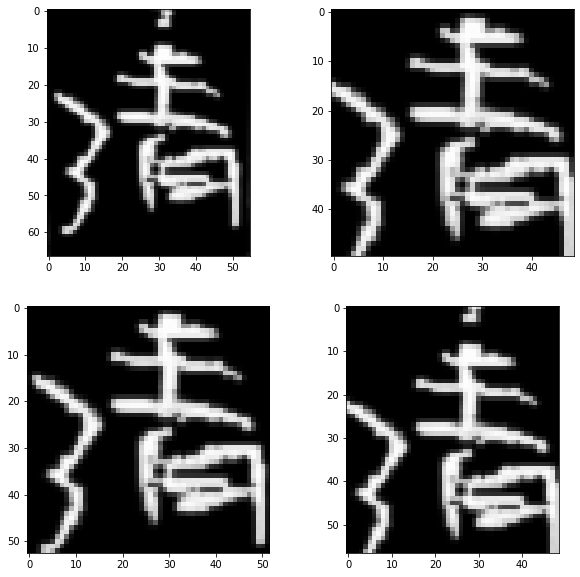

word            : 3 56011_徐.png
img size        : 60 67
split_by_black  : 0 11 57 67
split_by_contour: 5 0 56 67
crop area       : 5 11 56 67


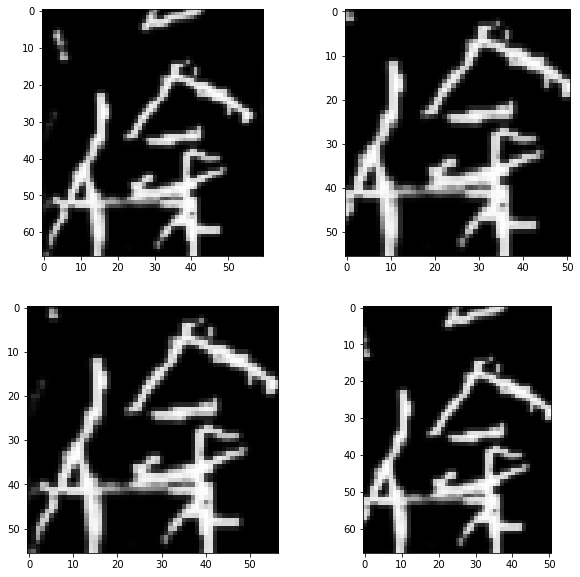

word            : 4 56014_俊.png
img size        : 51 67
split_by_black  : 0 11 51 67
split_by_contour: 0 0 51 67
crop area       : 0 11 51 67


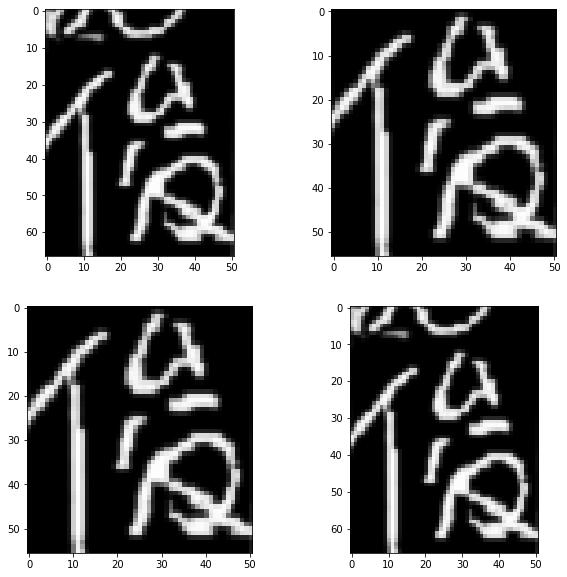

word            : 5 56021_消.png
img size        : 46 67
split_by_black  : 0 6 46 64
split_by_contour: 0 9 46 62
crop area       : 0 9 46 62


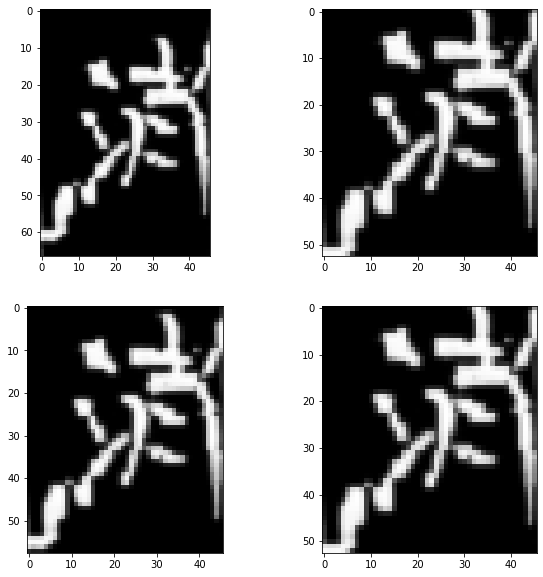

word            : 6 56030_婕.png
img size        : 73 67
split_by_black  : 3 8 54 57
split_by_contour: 5 10 68 56
crop area       : 5 10 54 56


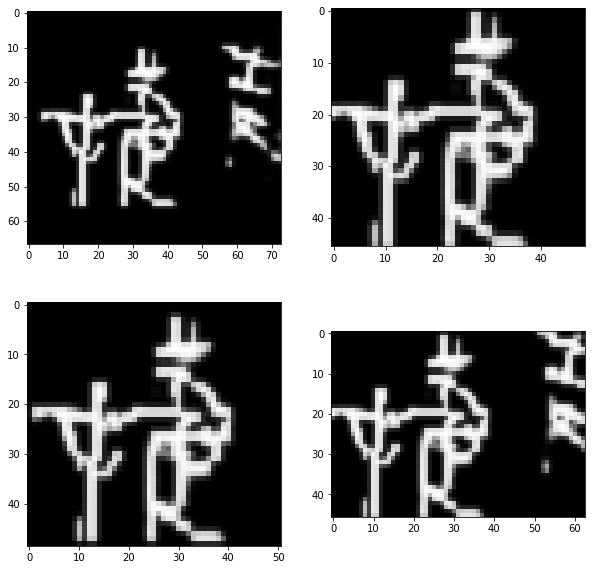

word            : 7 56033_嘉.png
img size        : 55 67
split_by_black  : 5 12 55 67
split_by_contour: 7 1 51 67
crop area       : 7 12 51 67


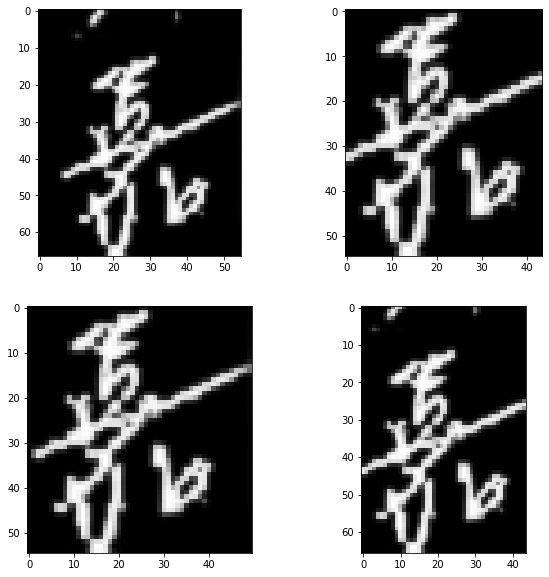

word            : 8 56036_平.png
img size        : 60 67
split_by_black  : 0 5 47 67
split_by_contour: 0 7 45 67
crop area       : 0 7 45 67


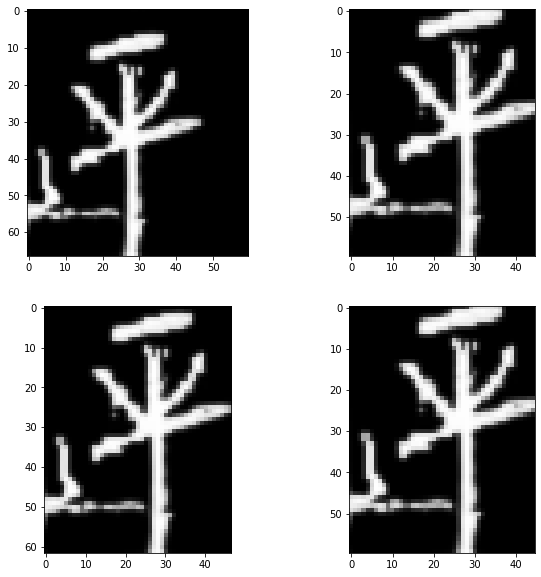

word            : 9 56048_婷.png
img size        : 102 67
split_by_black  : 13 0 76 64
split_by_contour: 15 0 90 67
crop area       : 15 0 76 64


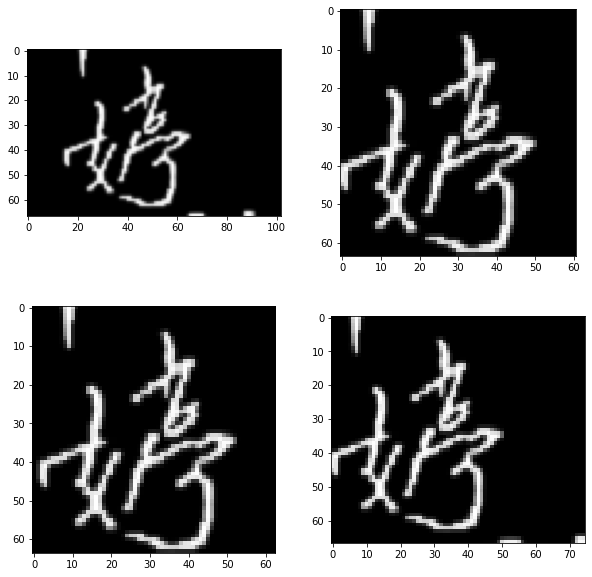

word            : 10 56065_豪.png
img size        : 68 67
split_by_black  : 17 0 68 67
split_by_contour: 0 0 68 67
crop area       : 17 0 68 67


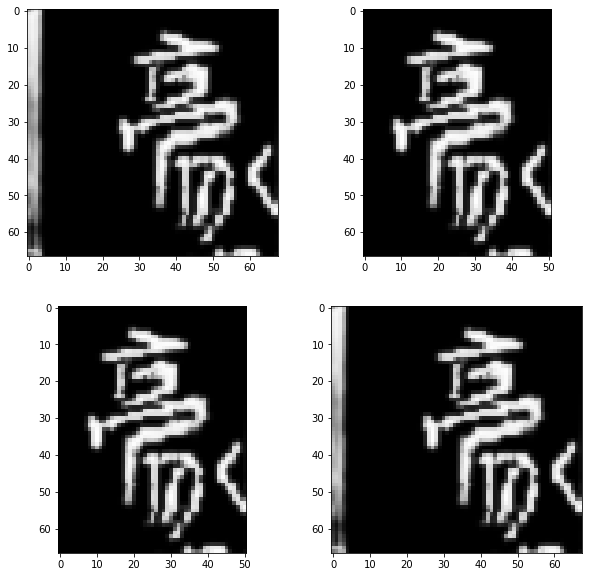

word            : 11 56072_珍.png
img size        : 78 67
split_by_black  : 4 16 58 67
split_by_contour: 6 0 58 67
crop area       : 6 16 58 67


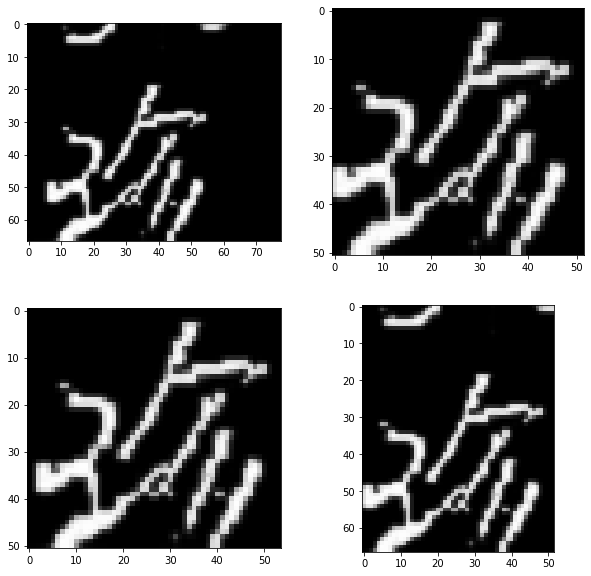

word            : 12 56074_數.png
img size        : 54 67
split_by_black  : 5 5 45 60
split_by_contour: 7 7 54 59
crop area       : 7 7 45 59


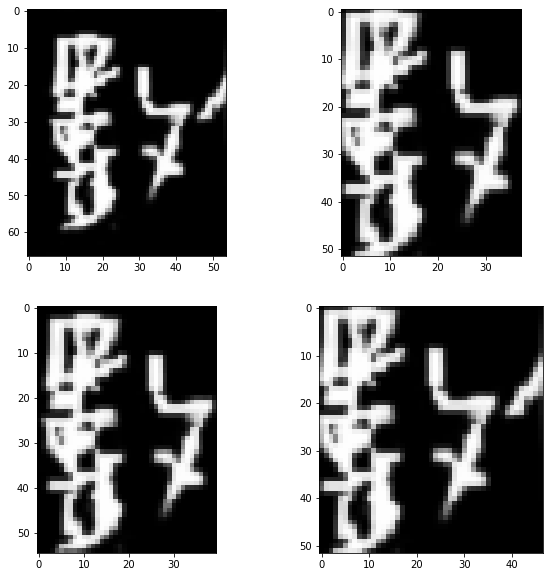

word            : 13 56077_廖.png
img size        : 78 67
split_by_black  : 19 8 67 67
split_by_contour: 26 0 66 63
crop area       : 26 8 66 63


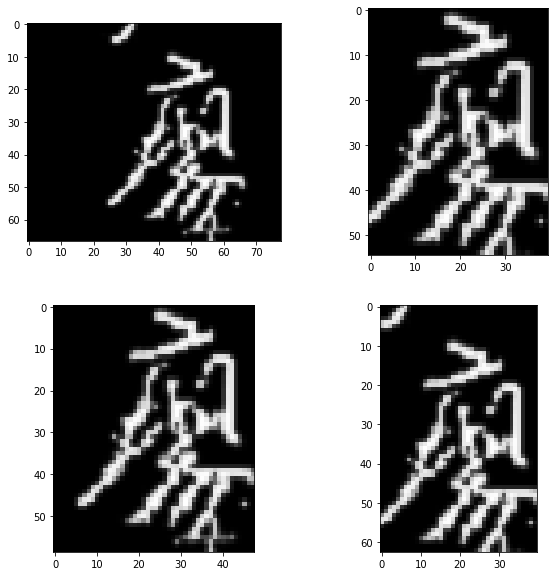

word            : 14 56084_馬.png
img size        : 79 67
split_by_black  : 16 0 74 67
split_by_contour: 18 6 73 67
crop area       : 18 6 73 67


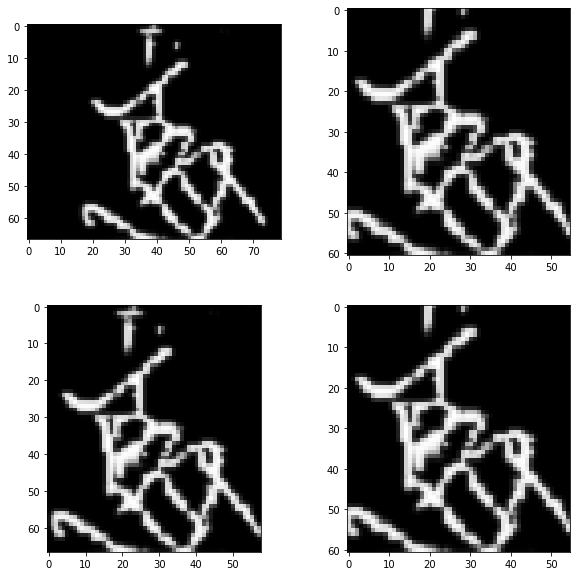

word            : 15 56088_克.png
img size        : 47 67
split_by_black  : 10 16 35 67
split_by_contour: 16 31 32 67
crop area       : 16 31 32 67


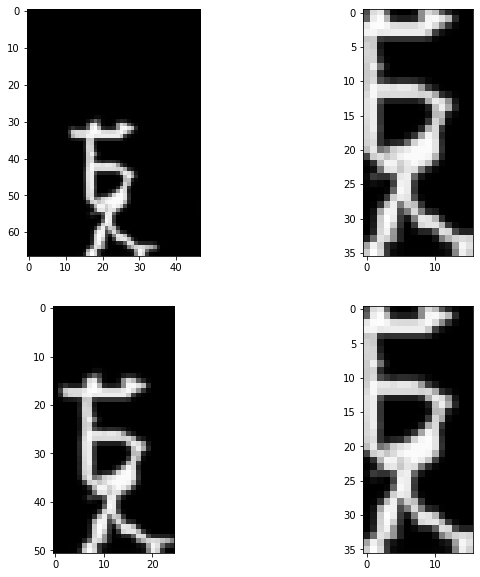

word            : 16 56089_勳.png
img size        : 70 67
split_by_black  : 0 0 60 67
split_by_contour: 0 0 59 67
crop area       : 0 0 59 67


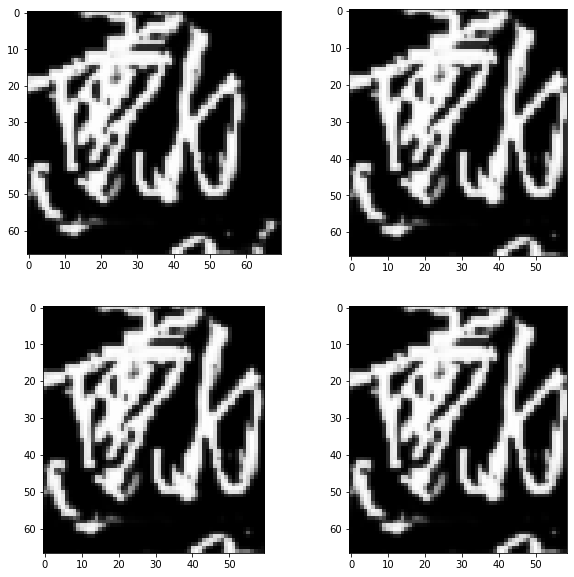

word            : 17 56090_長.png
img size        : 40 67
split_by_black  : 10 5 40 50
split_by_contour: 20 7 40 48
crop area       : 20 7 40 48


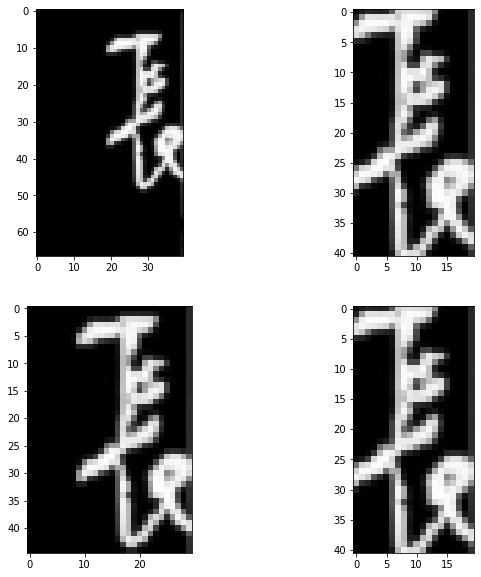

word            : 18 56095_消.png
img size        : 41 67
split_by_black  : 3 2 41 54
split_by_contour: 5 5 41 67
crop area       : 5 5 41 54


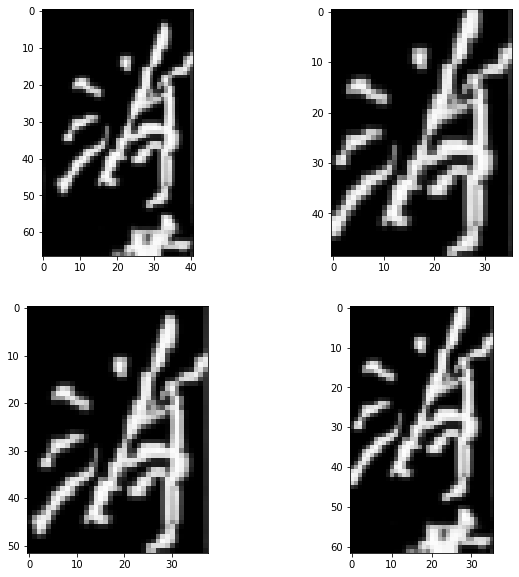

word            : 19 56113_翔.png
img size        : 71 67
split_by_black  : 0 0 59 67
split_by_contour: 0 0 58 67
crop area       : 0 0 58 67


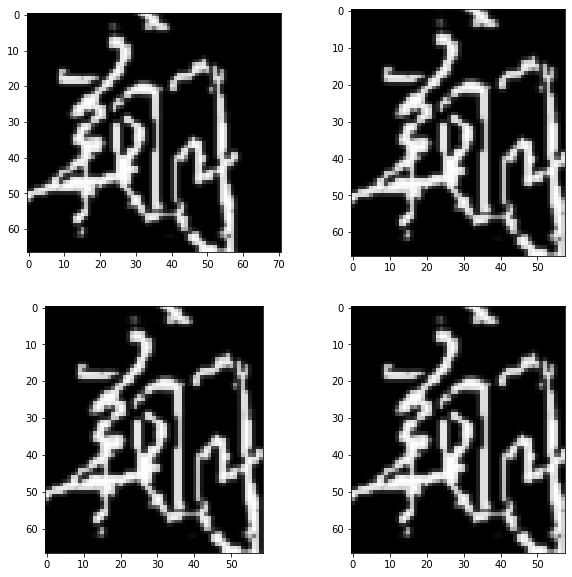

word            : 20 56119_信.png
img size        : 59 67
split_by_black  : 13 14 54 67
split_by_contour: 15 0 53 65
crop area       : 15 14 53 65


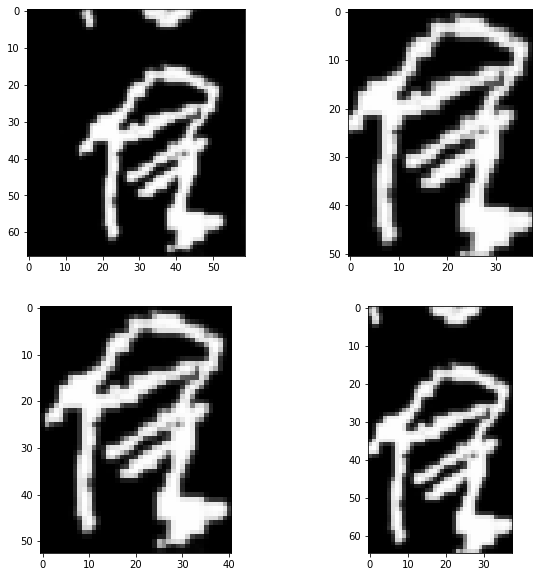

word            : 21 56159_婷.png
img size        : 110 67
split_by_black  : 17 0 82 67
split_by_contour: 19 5 67 67
crop area       : 19 5 67 67


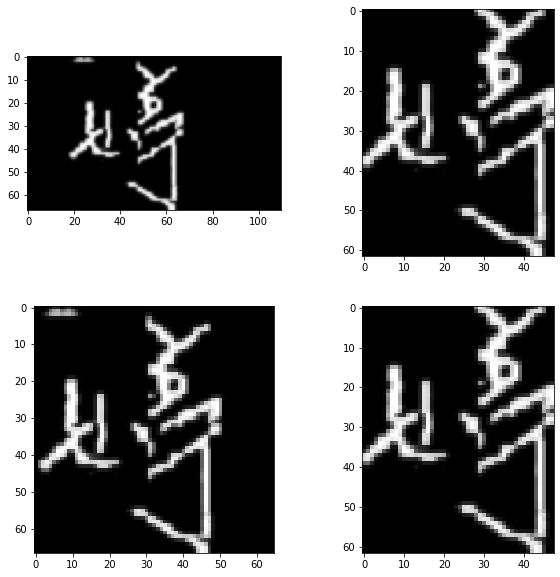

word            : 22 56163_承.png
img size        : 53 67
split_by_black  : 0 13 53 67
split_by_contour: 1 0 51 64
crop area       : 1 13 51 64


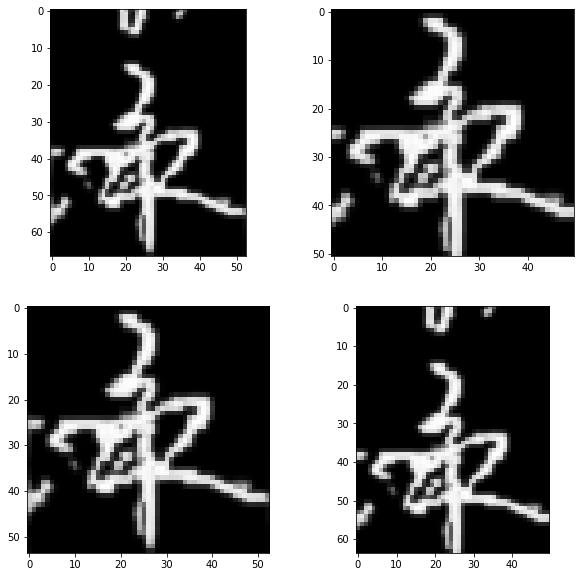

word            : 23 56180_北.png
img size        : 42 67
split_by_black  : 4 16 42 52
split_by_contour: 6 23 39 51
crop area       : 6 23 39 51


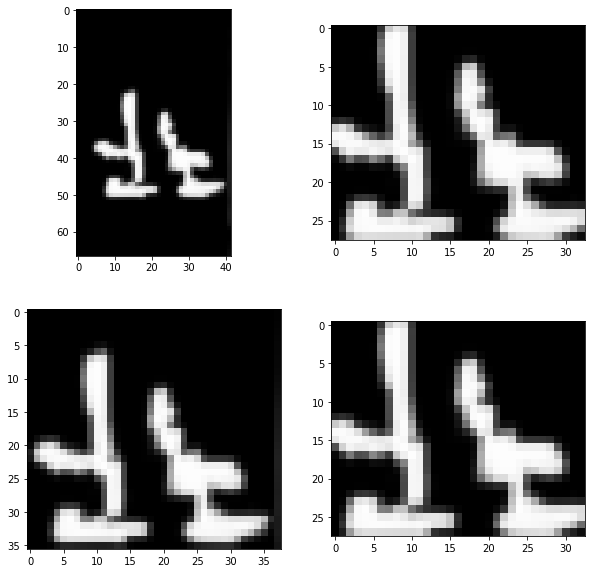

word            : 24 56184_孟.png
img size        : 43 67
split_by_black  : 6 15 41 63
split_by_contour: 8 17 39 62
crop area       : 8 17 39 62


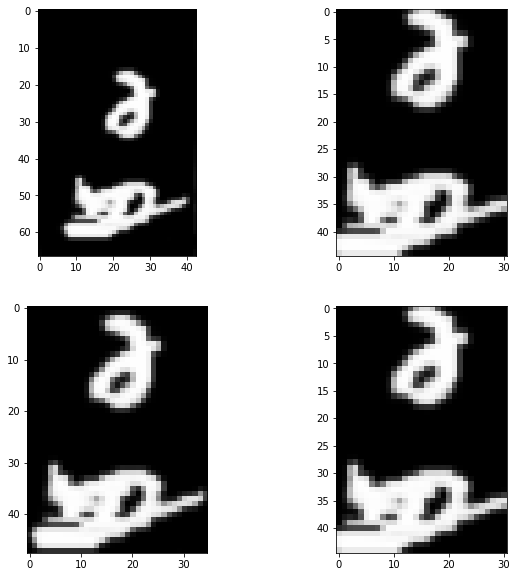

word            : 25 56204_淑.png
img size        : 73 67
split_by_black  : 6 16 60 67
split_by_contour: 9 0 73 67
crop area       : 9 16 60 67


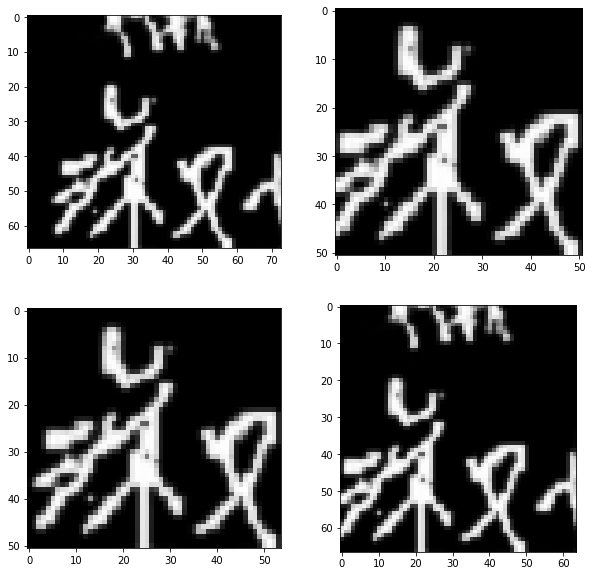

word            : 26 56217_耀.png
img size        : 58 67
split_by_black  : 5 16 53 67
split_by_contour: 8 0 52 67
crop area       : 8 16 52 67


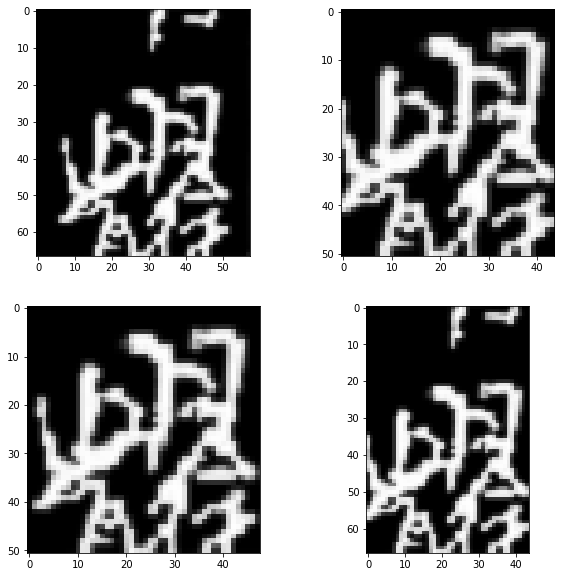

word            : 27 56219_軒.png
img size        : 77 67
split_by_black  : 11 14 57 67
split_by_contour: 11 0 48 67
crop area       : 11 14 48 67


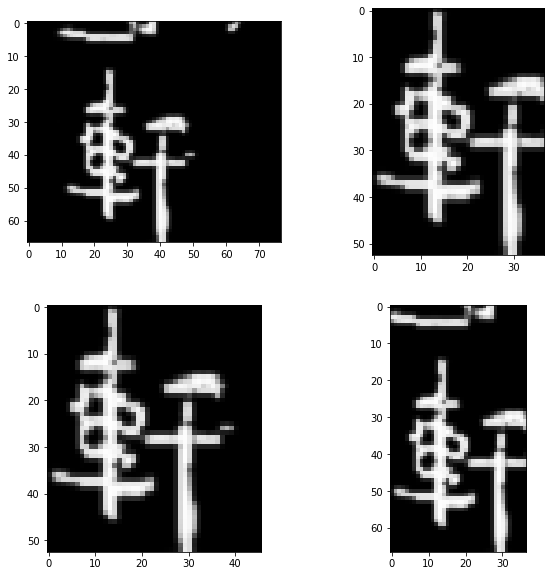

word            : 28 56229_瓊.png
img size        : 44 67
split_by_black  : 5 7 44 64
split_by_contour: 7 0 41 62
crop area       : 7 7 41 62


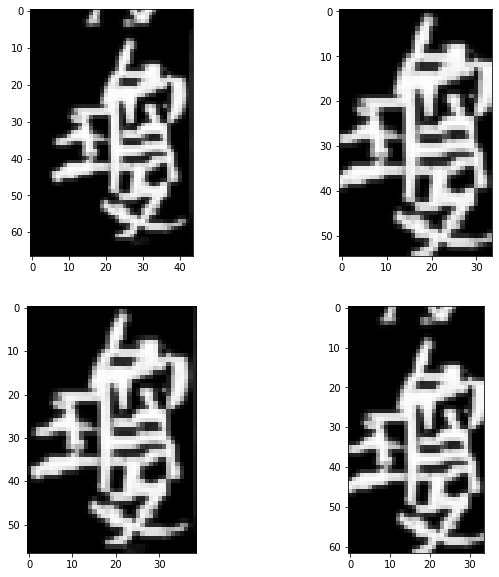

word            : 29 56230_智.png
img size        : 41 67
split_by_black  : 10 4 41 57
split_by_contour: 0 8 41 56
crop area       : 10 8 41 56


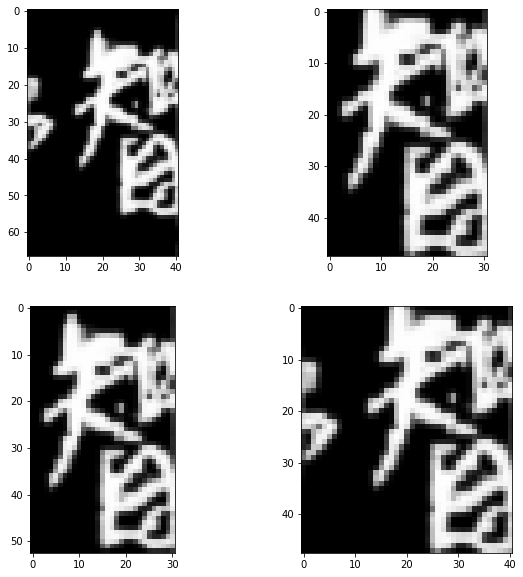

word            : 30 56236_茂.png
img size        : 49 67
split_by_black  : 4 0 49 67
split_by_contour: 6 0 46 67
crop area       : 6 0 46 67


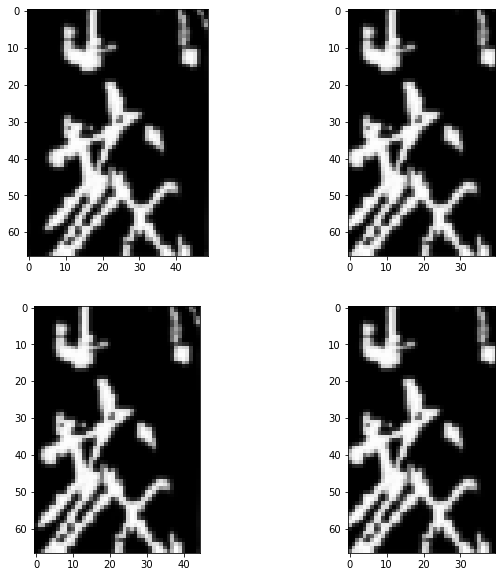

word            : 31 56243_景.png
img size        : 58 67
split_by_black  : 0 0 55 57
split_by_contour: 5 0 53 67
crop area       : 5 0 53 57


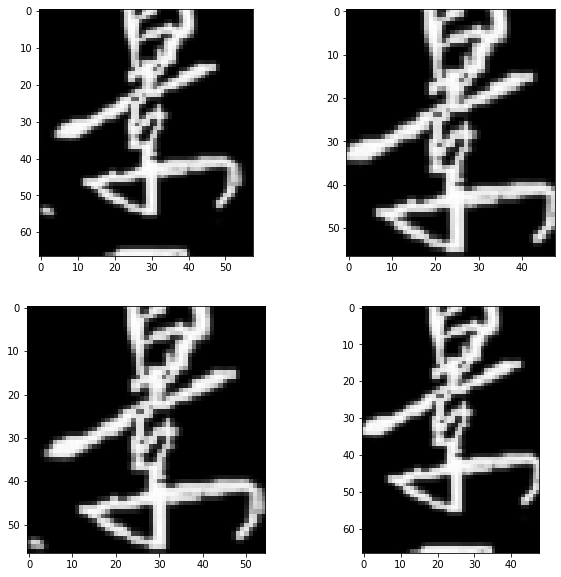

word            : 32 56248_曾.png
img size        : 72 67
split_by_black  : 18 6 70 67
split_by_contour: 29 0 69 67
crop area       : 29 6 69 67


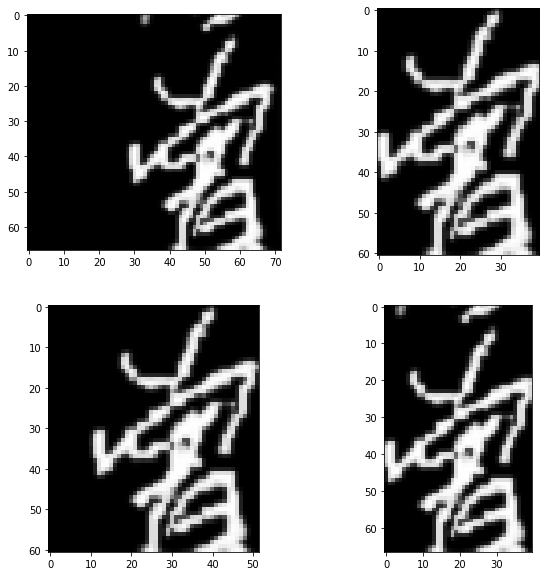

word            : 33 56270_胡.png
img size        : 53 67
split_by_black  : 13 16 51 64
split_by_contour: 17 0 52 63
crop area       : 17 16 51 63


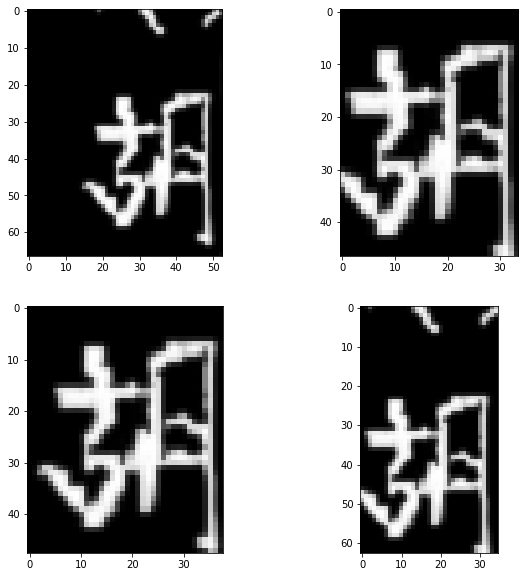

word            : 34 56272_素.png
img size        : 45 67
split_by_black  : 3 0 38 67
split_by_contour: 5 0 37 67
crop area       : 5 0 37 67


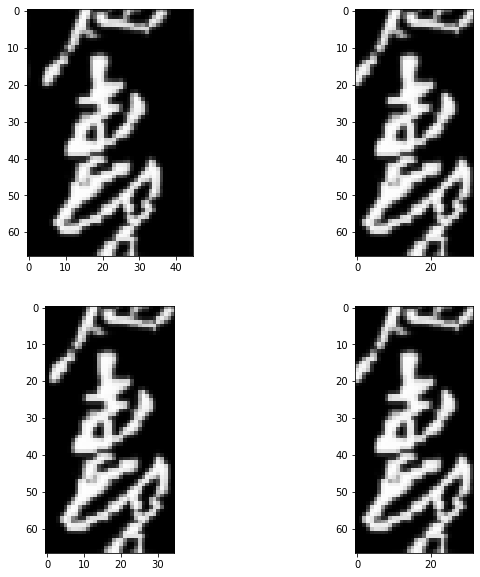

word            : 35 56275_紹.png
img size        : 57 67
split_by_black  : 6 15 55 67
split_by_contour: 9 0 54 67
crop area       : 9 15 54 67


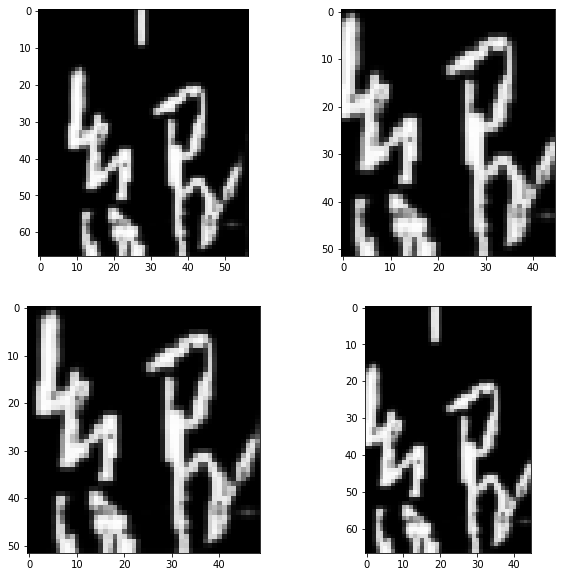

word            : 36 56285_彭.png
img size        : 76 67
split_by_black  : 19 11 57 67
split_by_contour: 23 1 67 67
crop area       : 23 11 57 67


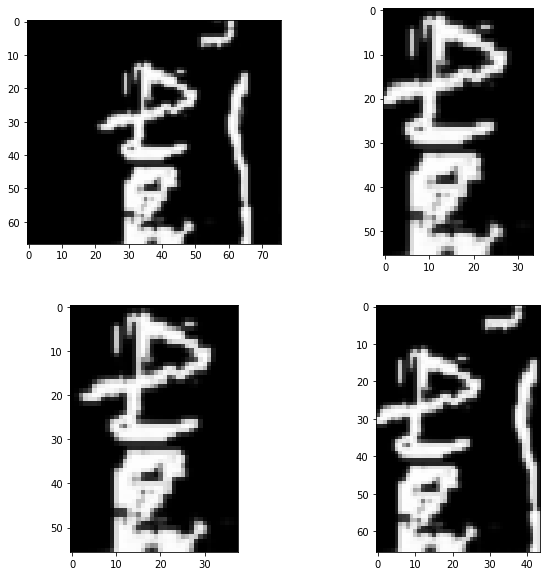

word            : 37 56305_樓.png
img size        : 92 67
split_by_black  : 23 0 88 67
split_by_contour: 38 0 84 67
crop area       : 38 0 84 67


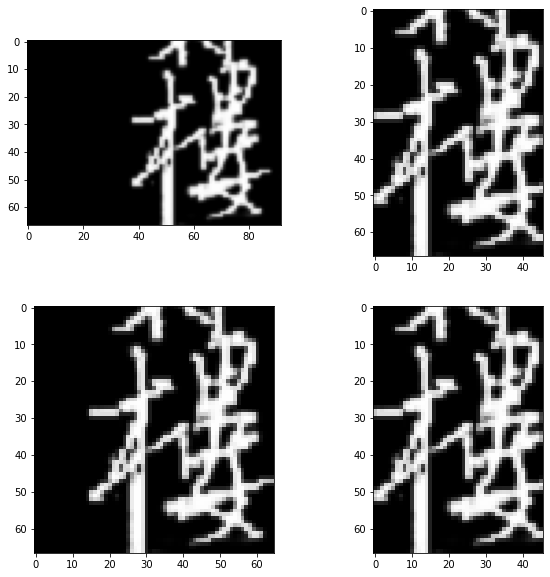

word            : 38 56324_津.png
img size        : 50 67
split_by_black  : 1 10 50 62
split_by_contour: 3 12 48 56
crop area       : 3 12 48 56


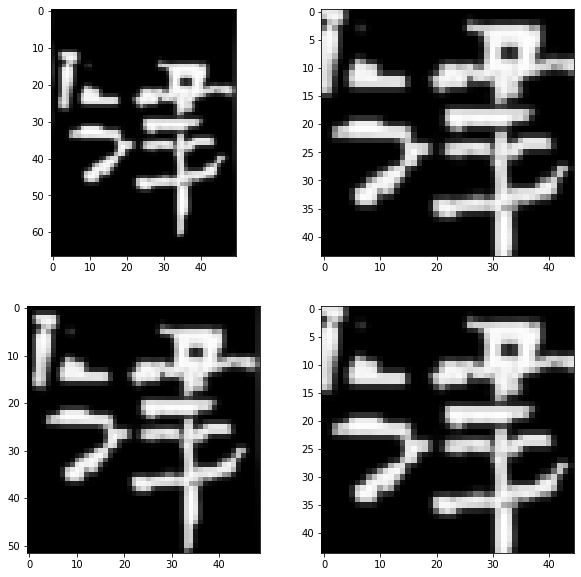

word            : 39 56325_鋒.png
img size        : 85 67
split_by_black  : 13 12 64 67
split_by_contour: 8 0 71 67
crop area       : 13 12 64 67


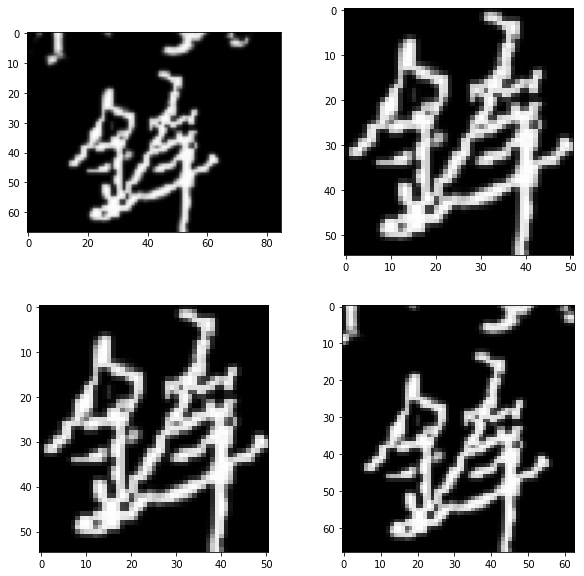

word            : 40 56334_韻.png
img size        : 94 67
split_by_black  : 5 15 71 67
split_by_contour: 1 0 71 67
crop area       : 5 15 71 67


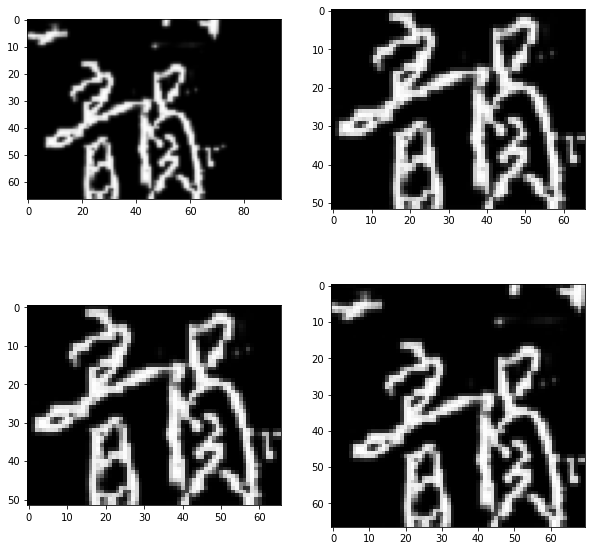

word            : 41 56342_鐵.png
img size        : 51 67
split_by_black  : 0 11 51 59
split_by_contour: 0 13 51 58
crop area       : 0 13 51 58


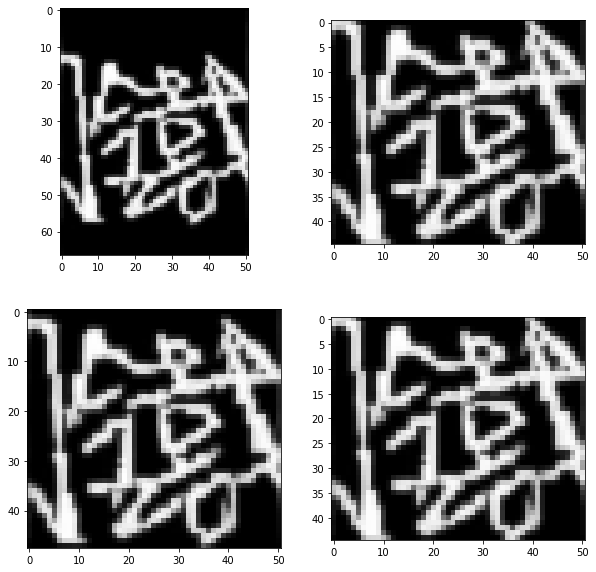

word            : 42 56345_詮.png
img size        : 75 67
split_by_black  : 0 13 60 67
split_by_contour: 0 0 59 67
crop area       : 0 13 59 67


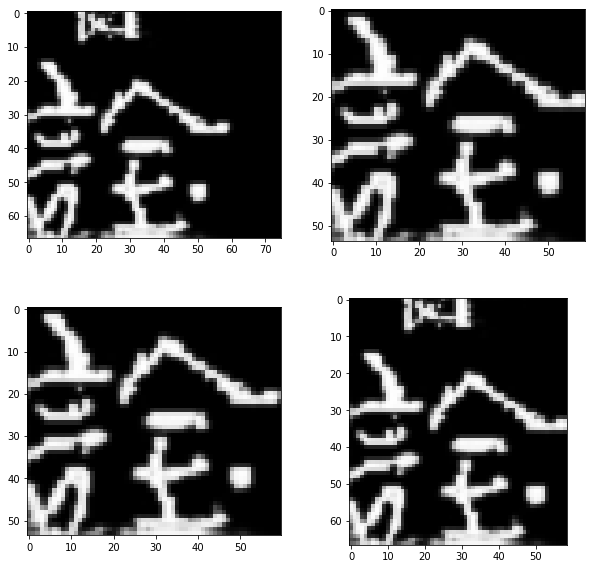

word            : 43 56348_巫.png
img size        : 69 67
split_by_black  : 17 10 65 50
split_by_contour: 29 12 64 43
crop area       : 29 12 64 43


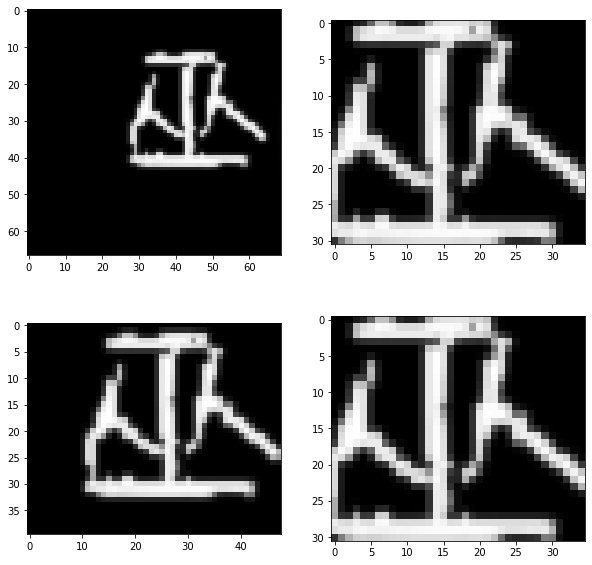

word            : 44 56364_燕.png
img size        : 47 67
split_by_black  : 9 11 41 67
split_by_contour: 11 2 39 67
crop area       : 11 11 39 67


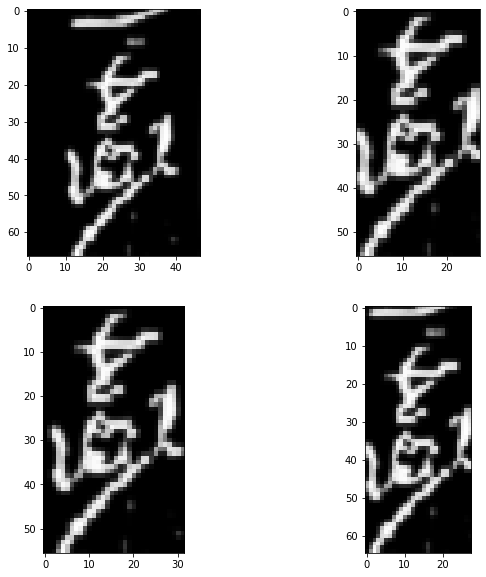

word            : 45 56371_紋.png
img size        : 69 67
split_by_black  : 17 0 66 67
split_by_contour: 19 0 64 67
crop area       : 19 0 64 67


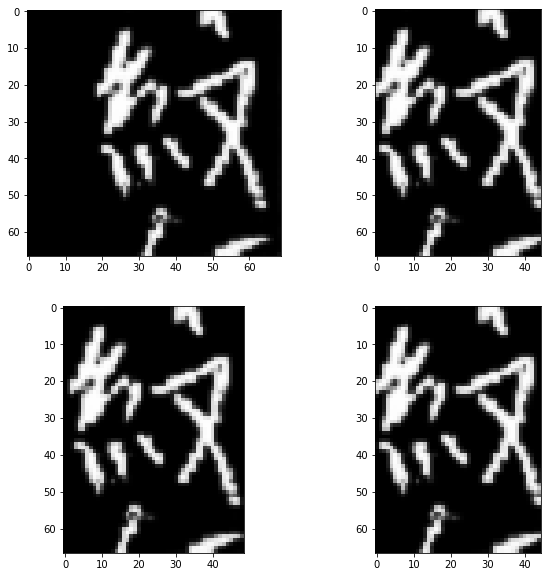

word            : 46 56375_區.png
img size        : 59 67
split_by_black  : 10 5 59 67
split_by_contour: 13 2 56 65
crop area       : 13 5 56 65


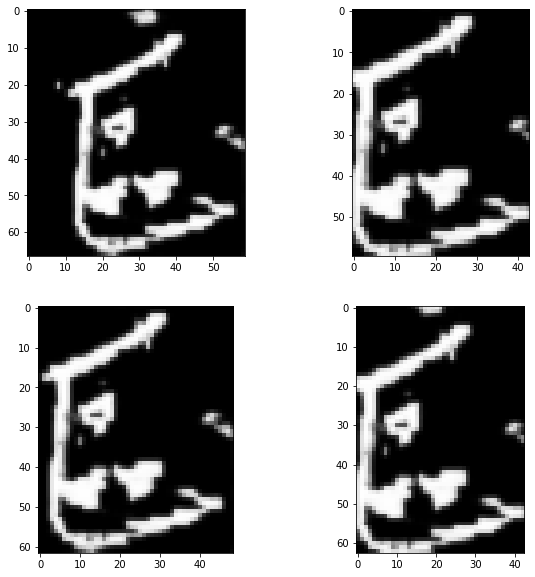

word            : 47 56379_鼎.png
img size        : 56 67
split_by_black  : 14 16 54 67
split_by_contour: 16 0 56 67
crop area       : 16 16 54 67


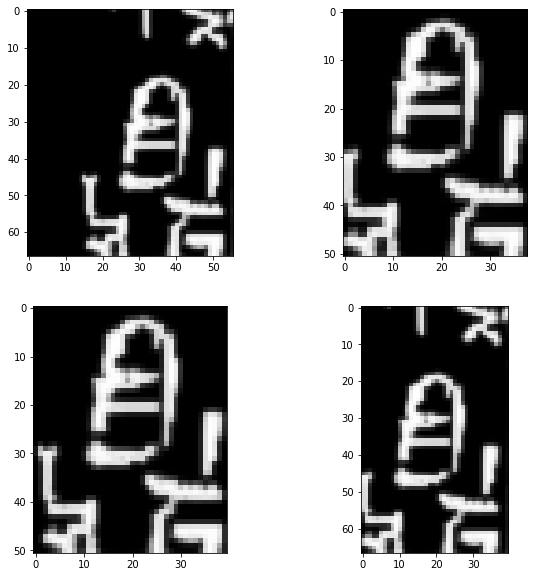

word            : 48 56390_辰.png
img size        : 59 67
split_by_black  : 14 16 59 67
split_by_contour: 13 0 57 66
crop area       : 14 16 57 66


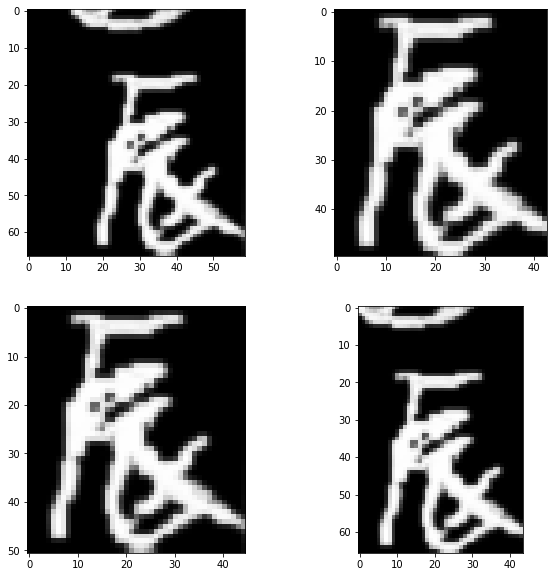

word            : 49 56391_五.png
img size        : 53 67
split_by_black  : 13 13 53 57
split_by_contour: 16 0 53 55
crop area       : 16 13 53 55


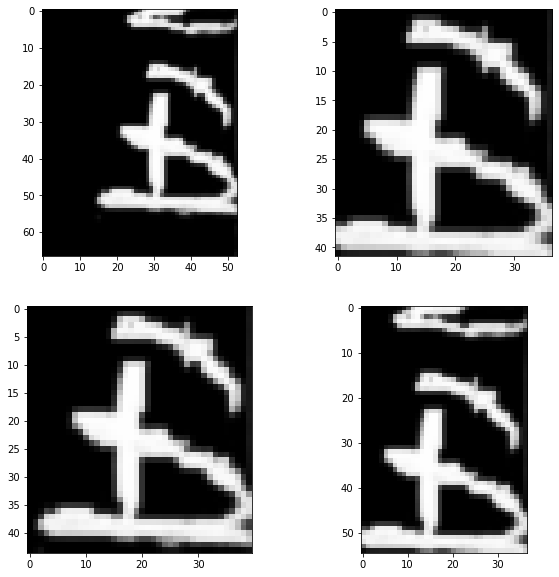

word            : 50 56400_錦.png
img size        : 61 67
split_by_black  : 0 15 61 67
split_by_contour: 0 0 61 64
crop area       : 0 15 61 64


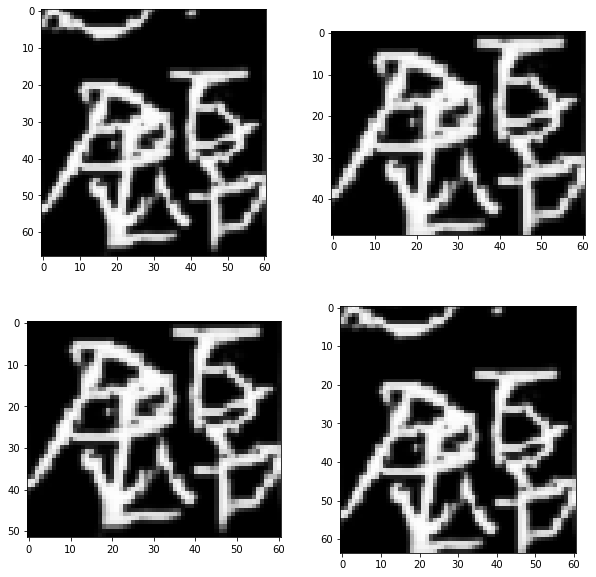

word            : 51 56406_榕.png
img size        : 61 67
split_by_black  : 0 0 48 67
split_by_contour: 0 0 58 67
crop area       : 0 0 48 67


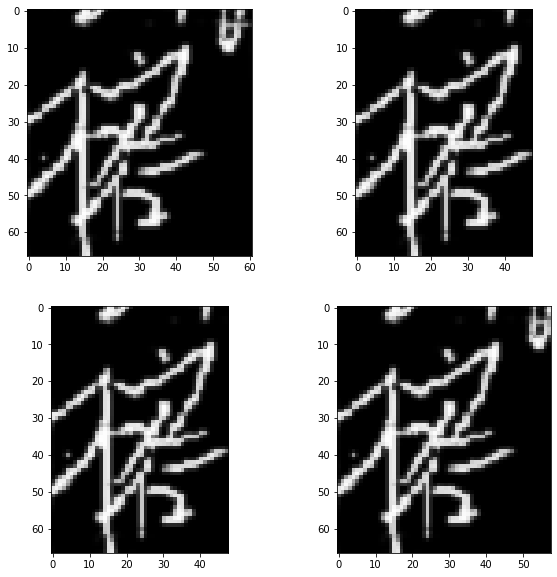

word            : 52 56418_姜.png
img size        : 56 67
split_by_black  : 14 0 52 67
split_by_contour: 21 0 50 67
crop area       : 21 0 50 67


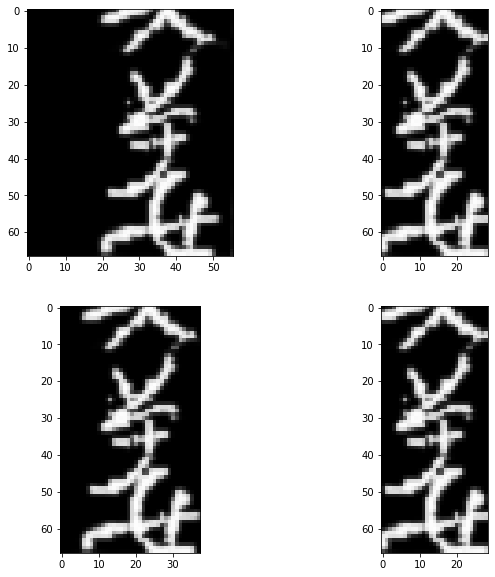

word            : 53 56428_藥.png
img size        : 45 67
split_by_black  : 6 0 45 67
split_by_contour: 8 0 42 67
crop area       : 8 0 42 67


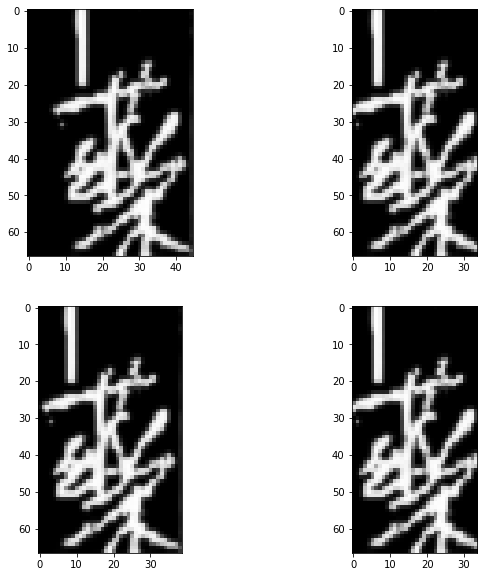

word            : 54 56432_雪.png
img size        : 68 67
split_by_black  : 7 8 51 64
split_by_contour: 9 10 68 63
crop area       : 9 10 51 63


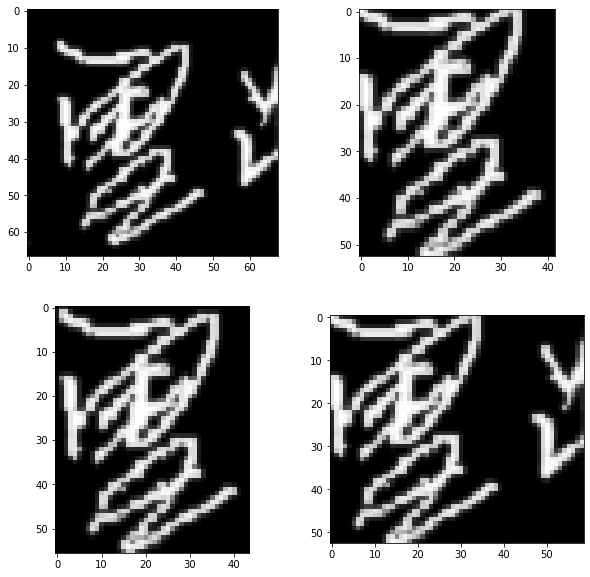

word            : 55 56435_君.png
img size        : 78 67
split_by_black  : 7 16 58 62
split_by_contour: 9 0 55 61
crop area       : 9 16 55 61


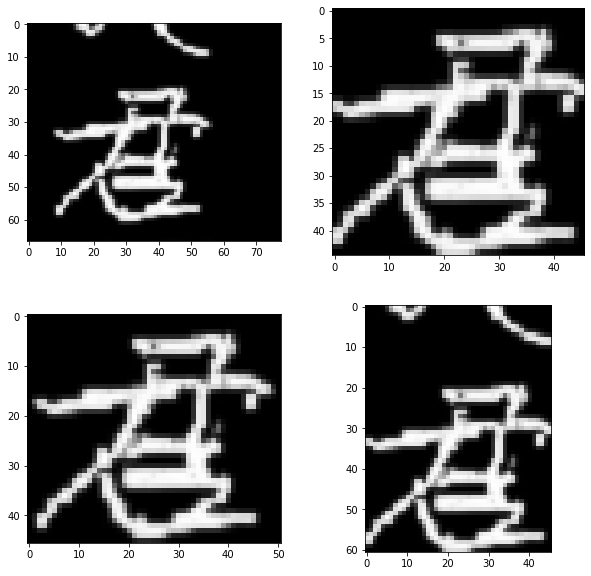

word            : 56 56436_蓉.png
img size        : 89 67
split_by_black  : 0 0 66 67
split_by_contour: 0 0 63 67
crop area       : 0 0 63 67


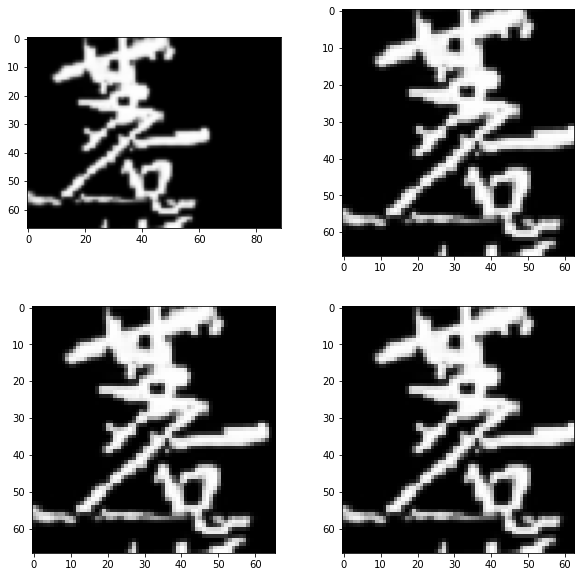

word            : 57 56438_曹.png
img size        : 53 67
split_by_black  : 11 13 47 64
split_by_contour: 5 5 45 62
crop area       : 11 13 45 62


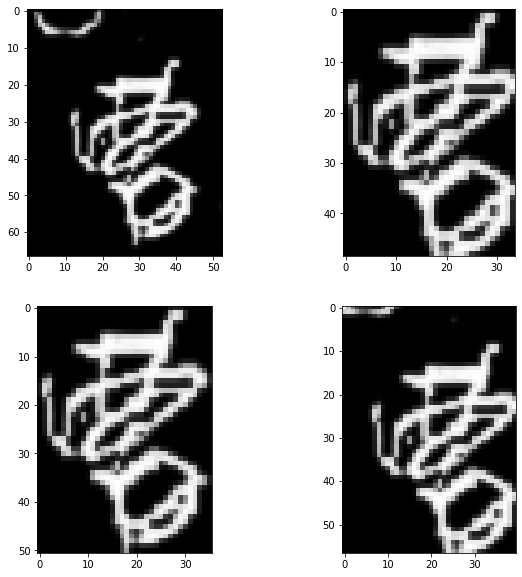

word            : 58 56440_堅.png
img size        : 87 67
split_by_black  : 8 0 65 60
split_by_contour: 10 0 61 67
crop area       : 10 0 61 60


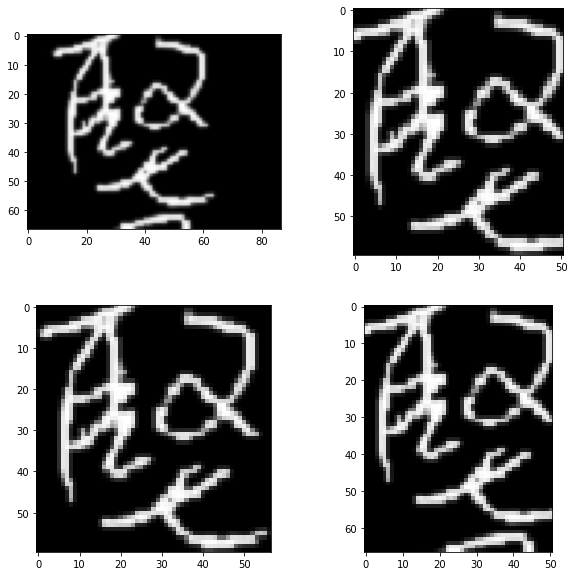

word            : 59 56441_伶.png
img size        : 47 67
split_by_black  : 3 16 45 67
split_by_contour: 6 22 44 67
crop area       : 6 22 44 67


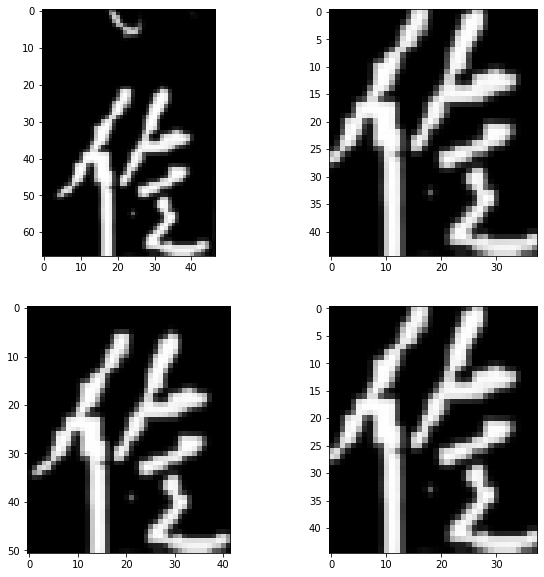

word            : 60 56444_漢.png
img size        : 58 67
split_by_black  : 7 1 56 67
split_by_contour: 9 3 55 67
crop area       : 9 3 55 67


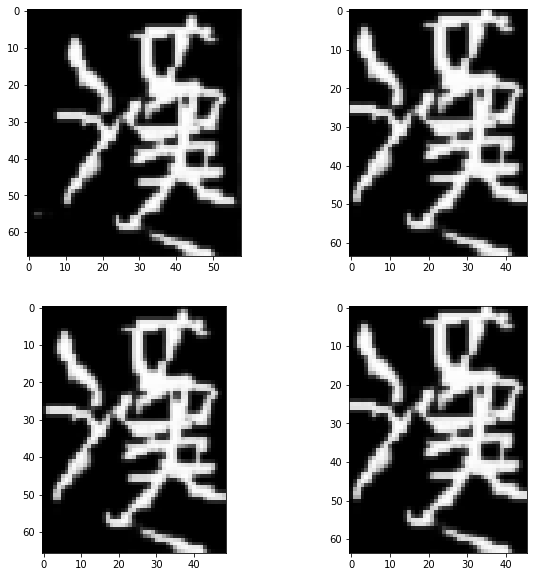

word            : 61 56453_致.png
img size        : 62 67
split_by_black  : 7 16 60 67
split_by_contour: 10 0 59 67
crop area       : 10 16 59 67


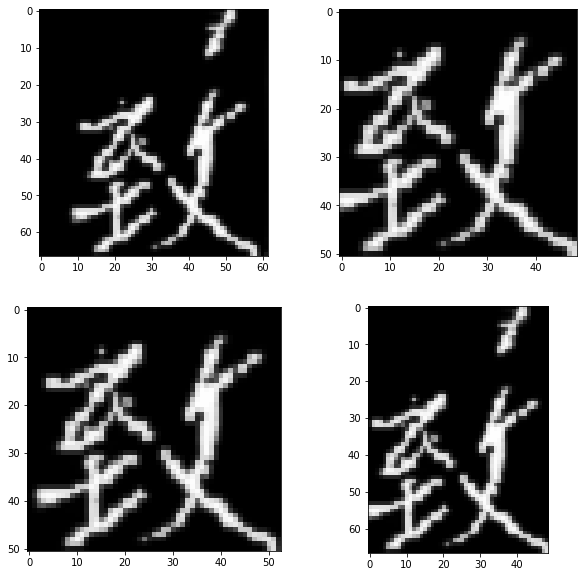

word            : 62 56456_翁.png
img size        : 72 67
split_by_black  : 13 16 65 67
split_by_contour: 16 0 63 67
crop area       : 16 16 63 67


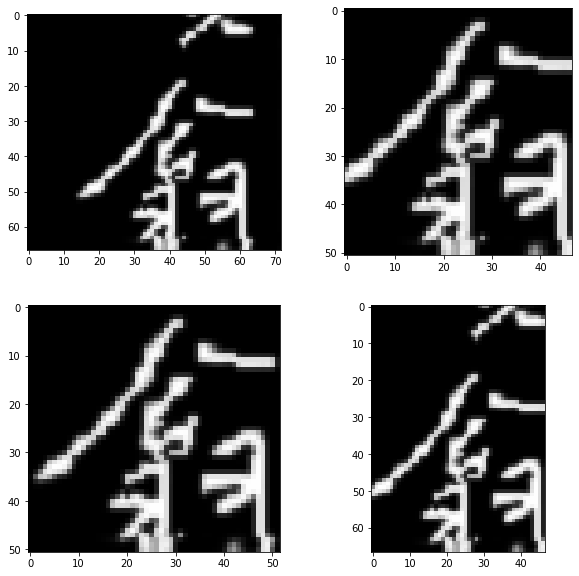

word            : 63 56484_盈.png
img size        : 51 67
split_by_black  : 0 0 51 67
split_by_contour: 0 0 51 67
crop area       : 0 0 51 67


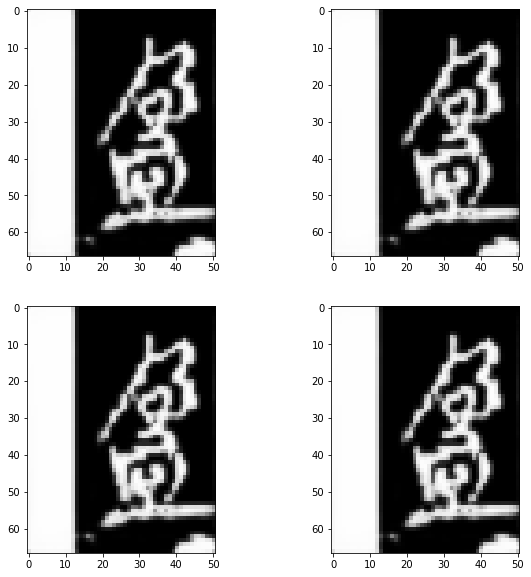

word            : 64 56509_秉.png
img size        : 47 67
split_by_black  : 0 11 47 67
split_by_contour: 3 1 46 64
crop area       : 3 11 46 64


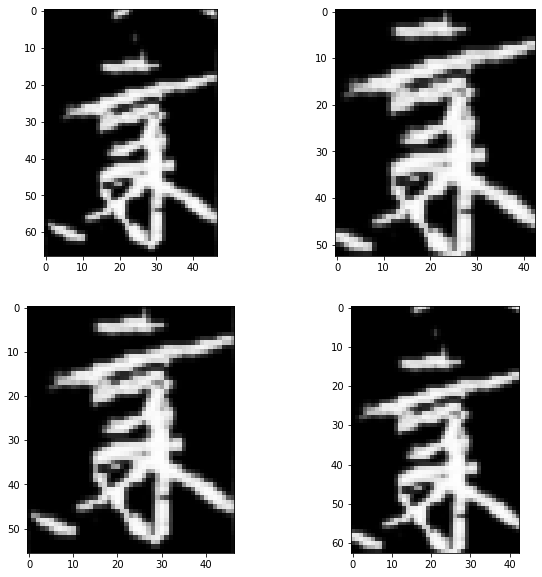

word            : 65 56530_阿.png
img size        : 60 67
split_by_black  : 12 16 60 67
split_by_contour: 14 0 60 67
crop area       : 14 16 60 67


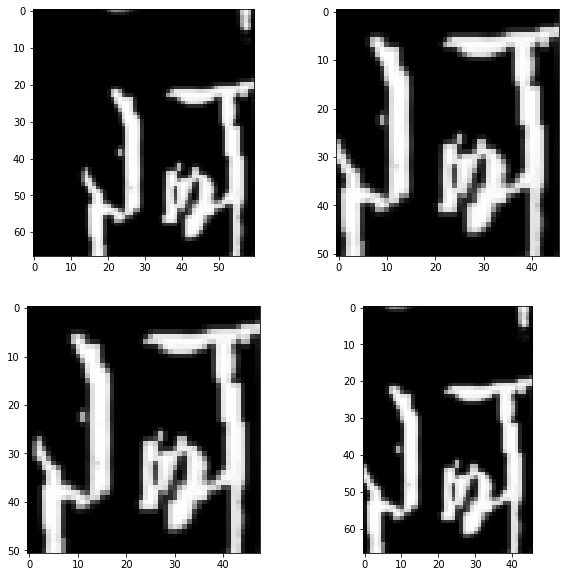

word            : 66 56531_洲.png
img size        : 83 67
split_by_black  : 10 16 62 60
split_by_contour: 12 0 82 59
crop area       : 12 16 62 59


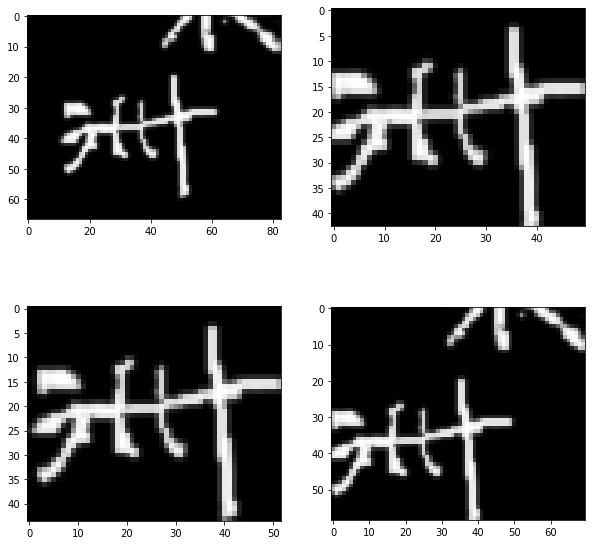

word            : 67 56538_靖.png
img size        : 67 67
split_by_black  : 3 0 61 67
split_by_contour: 4 0 60 67
crop area       : 4 0 60 67


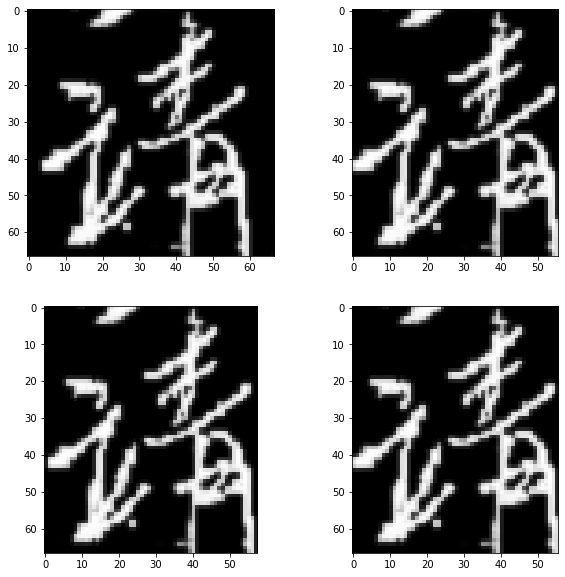

word            : 68 56545_煌.png
img size        : 68 67
split_by_black  : 7 12 63 67
split_by_contour: 9 0 62 67
crop area       : 9 12 62 67


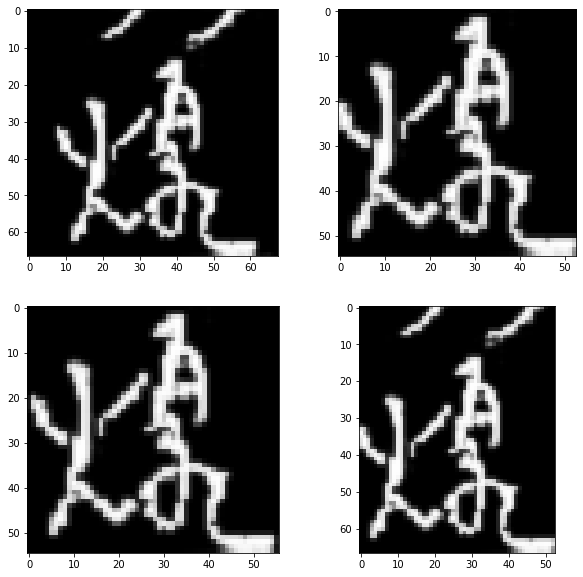

word            : 69 56546_廠.png
img size        : 57 67
split_by_black  : 2 11 57 64
split_by_contour: 4 3 57 63
crop area       : 4 11 57 63


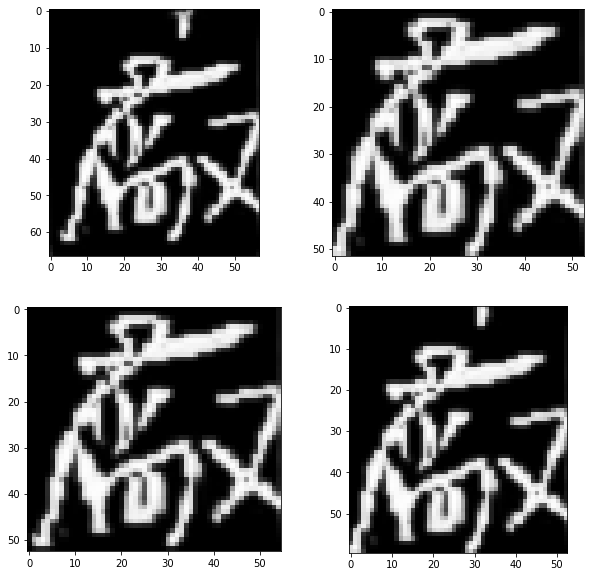

word            : 70 56549_菊.png
img size        : 57 67
split_by_black  : 0 10 42 67
split_by_contour: 2 0 39 67
crop area       : 2 10 39 67


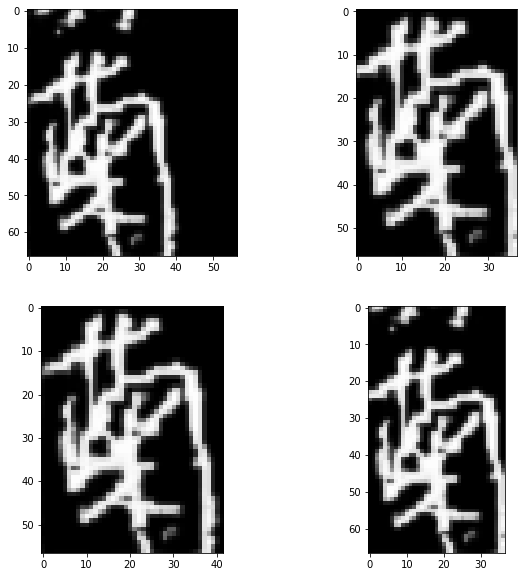

word            : 71 56555_庭.png
img size        : 79 67
split_by_black  : 12 16 59 67
split_by_contour: 16 0 58 67
crop area       : 16 16 58 67


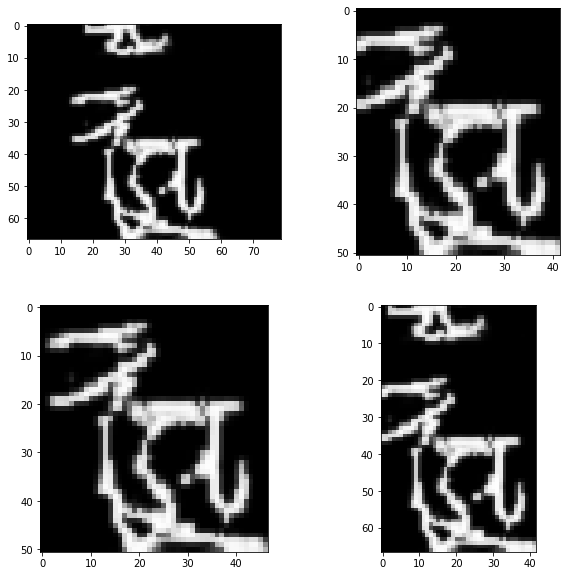

word            : 72 56556_男.png
img size        : 59 67
split_by_black  : 2 0 59 67
split_by_contour: 4 0 58 67
crop area       : 4 0 58 67


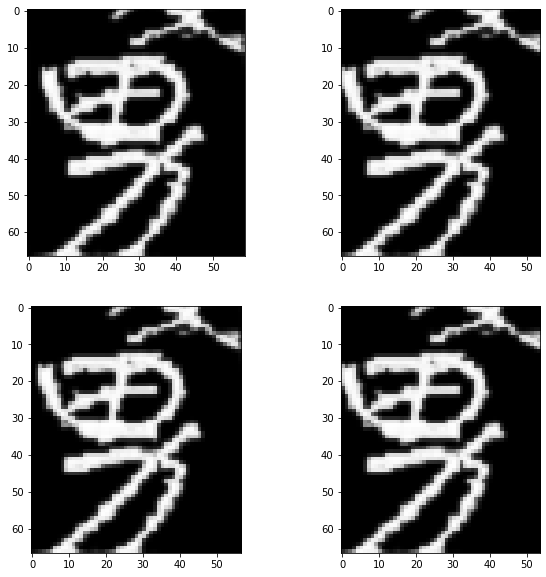

word            : 73 56566_冷.png
img size        : 54 67
split_by_black  : 0 11 46 61
split_by_contour: 0 13 54 67
crop area       : 0 13 46 61


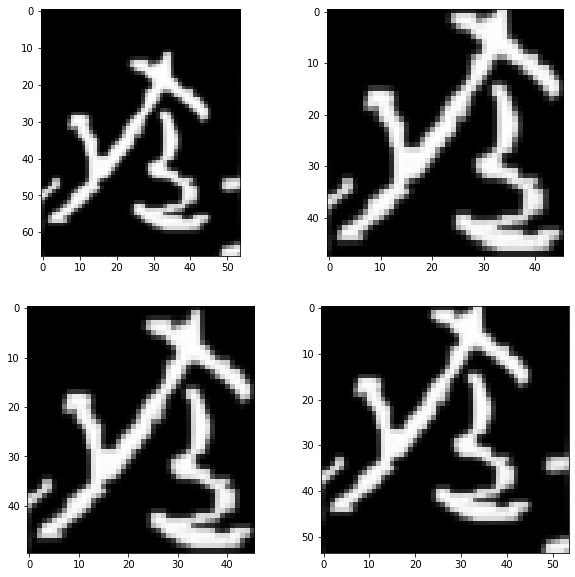

word            : 74 56571_珊.png
img size        : 70 67
split_by_black  : 0 9 56 67
split_by_contour: 0 0 55 67
crop area       : 0 9 55 67


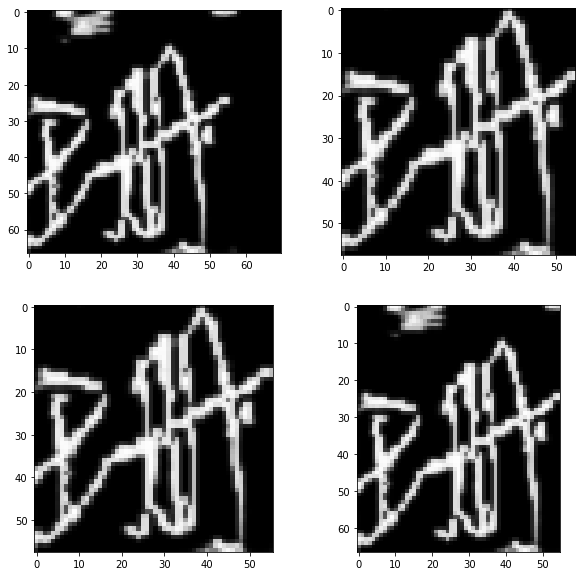

word            : 75 56572_芝.png
img size        : 63 67
split_by_black  : 5 5 63 55
split_by_contour: 7 7 56 67
crop area       : 7 7 56 55


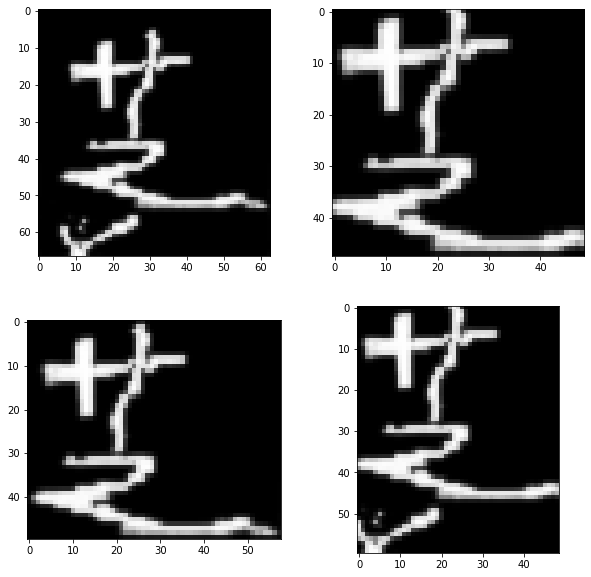

word            : 76 56581_曹.png
img size        : 119 67
split_by_black  : 0 0 110 67
split_by_contour: 0 0 109 67
crop area       : 0 0 109 67


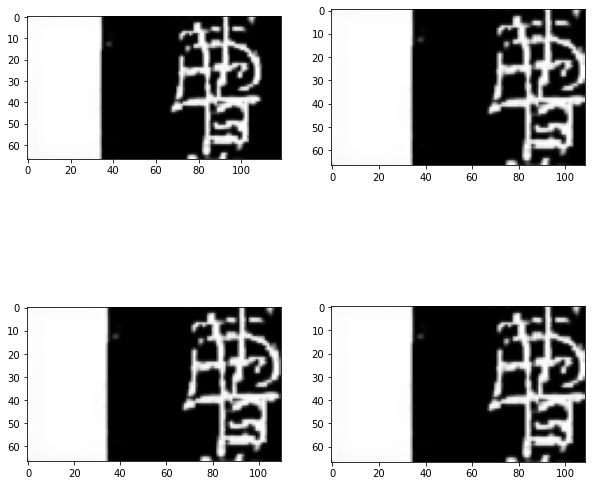

word            : 77 56583_晟.png
img size        : 51 67
split_by_black  : 12 16 47 63
split_by_contour: 15 2 45 62
crop area       : 15 16 45 62


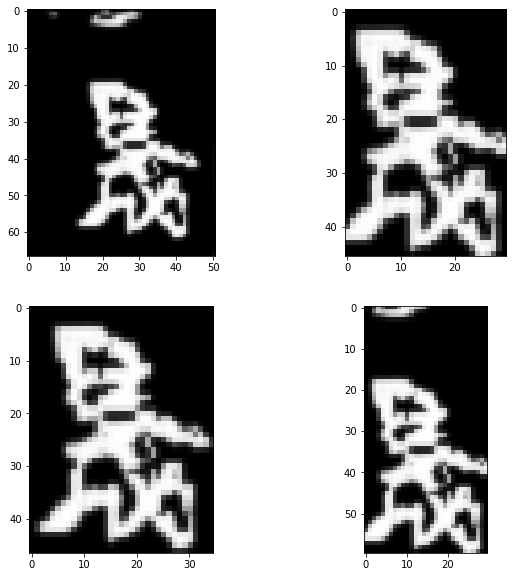

word            : 78 56585_忠.png
img size        : 42 67
split_by_black  : 0 7 42 59
split_by_contour: 3 10 37 55
crop area       : 3 10 37 55


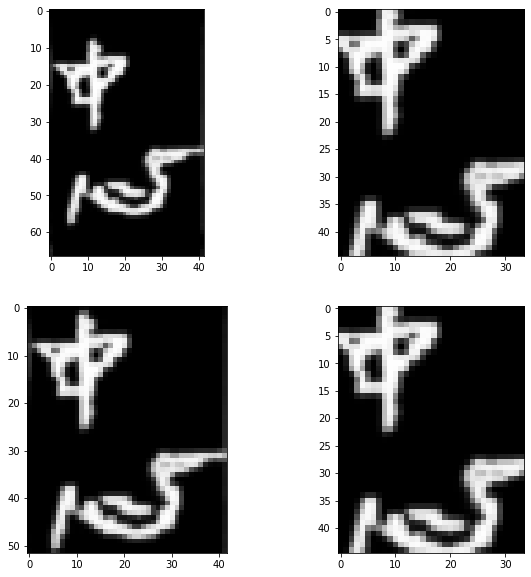

word            : 79 56593_研.png
img size        : 66 67
split_by_black  : 6 16 61 67
split_by_contour: 9 0 60 67
crop area       : 9 16 60 67


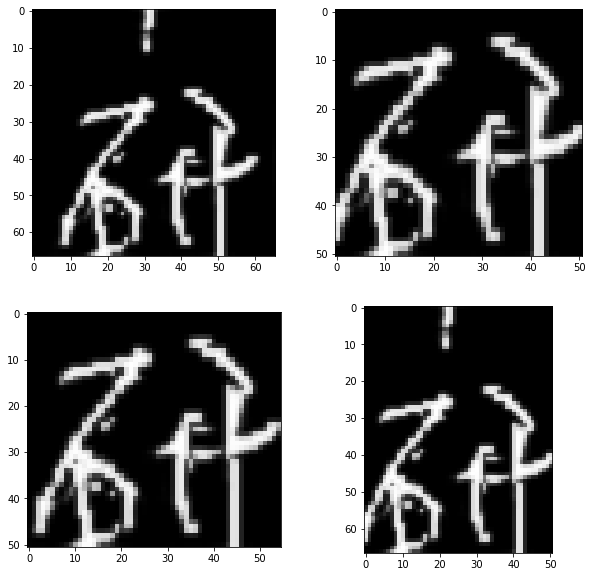

word            : 80 56596_五.png
img size        : 35 67
split_by_black  : 0 16 35 58
split_by_contour: 3 2 35 56
crop area       : 3 16 35 56


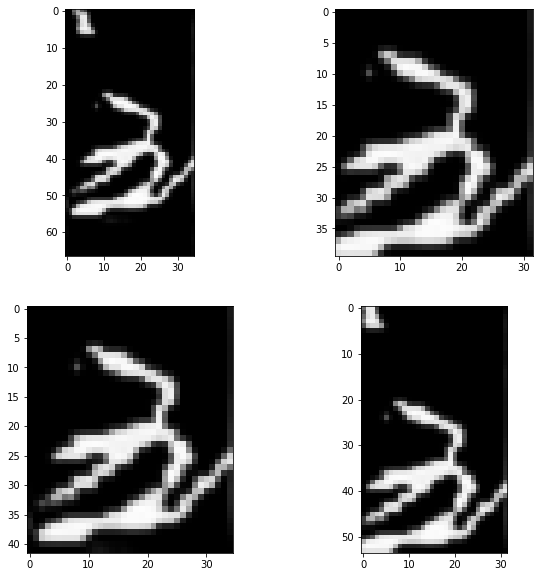

word            : 81 56623_亞.png
img size        : 43 67
split_by_black  : 3 11 32 50
split_by_contour: 5 15 25 46
crop area       : 5 15 25 46


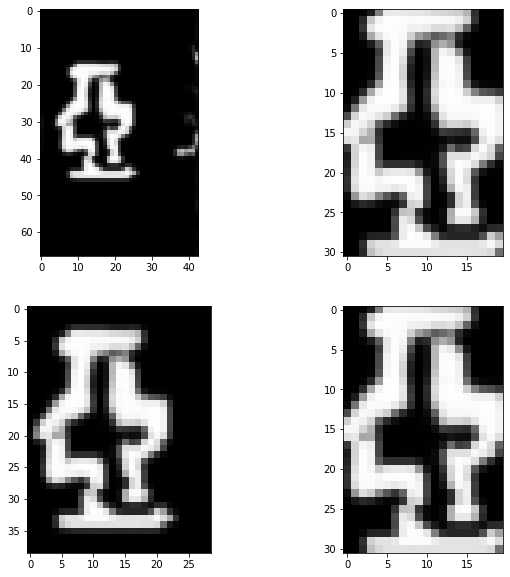

word            : 82 56633_同.png
img size        : 35 67
split_by_black  : 2 16 33 67
split_by_contour: 4 0 31 63
crop area       : 4 16 31 63


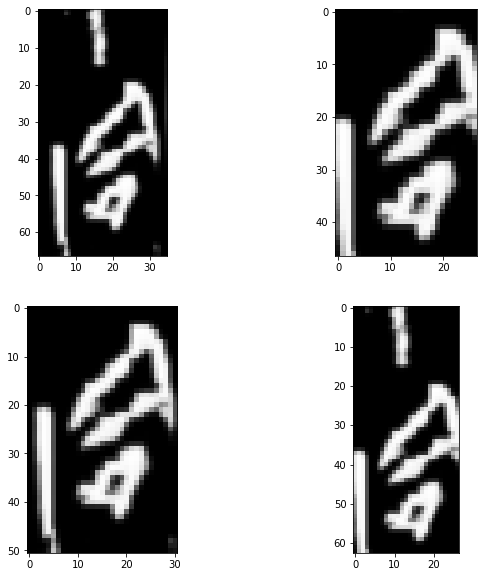

word            : 83 56643_禎.png
img size        : 67 67
split_by_black  : 2 5 50 67
split_by_contour: 5 8 45 67
crop area       : 5 8 45 67


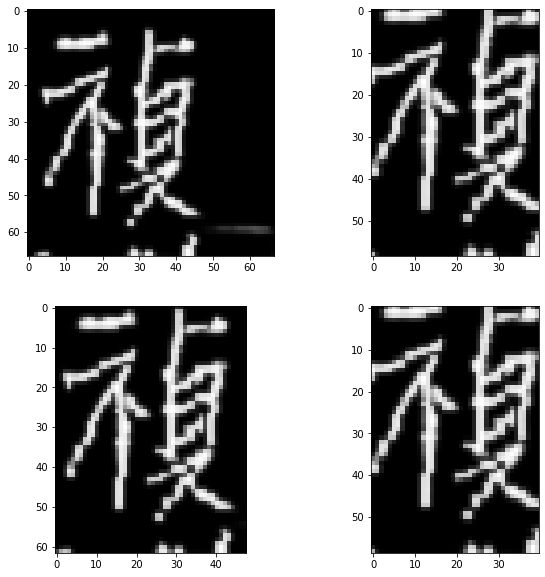

word            : 84 56645_鄭.png
img size        : 42 67
split_by_black  : 0 0 42 67
split_by_contour: 2 0 40 67
crop area       : 2 0 40 67


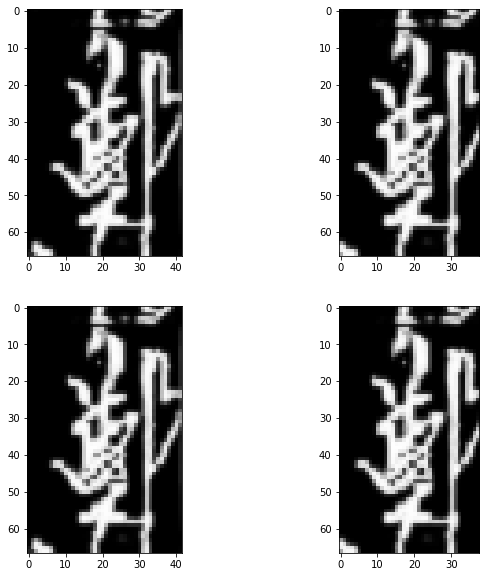

word            : 85 56646_豐.png
img size        : 55 67
split_by_black  : 0 0 55 67
split_by_contour: 1 0 55 67
crop area       : 1 0 55 67


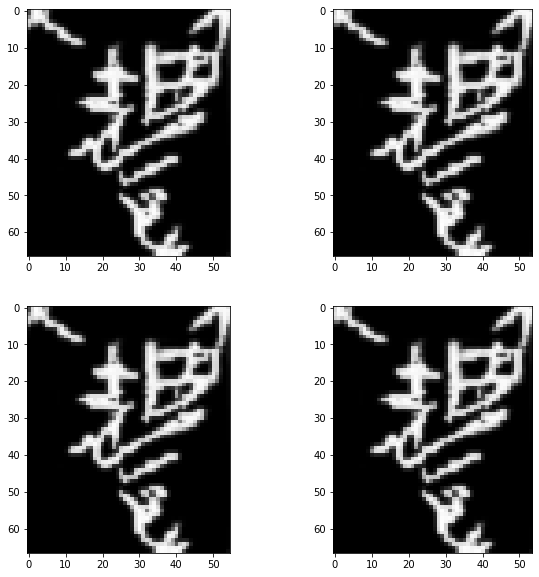

word            : 86 56649_婕.png
img size        : 41 67
split_by_black  : 0 9 41 67
split_by_contour: 3 0 40 64
crop area       : 3 9 40 64


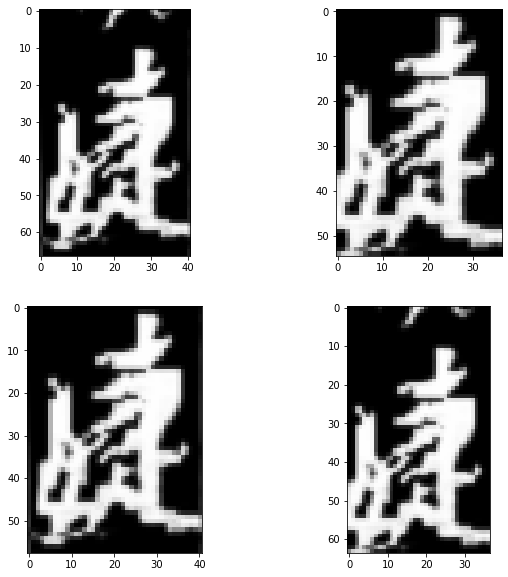

word            : 87 56653_孫.png
img size        : 84 67
split_by_black  : 19 10 72 67
split_by_contour: 21 0 78 65
crop area       : 21 10 72 65


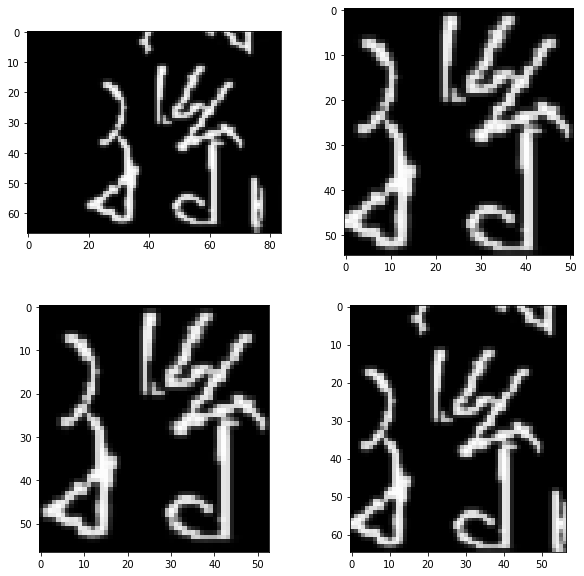

word            : 88 56662_鑫.png
img size        : 72 67
split_by_black  : 16 0 70 67
split_by_contour: 0 0 61 67
crop area       : 16 0 61 67


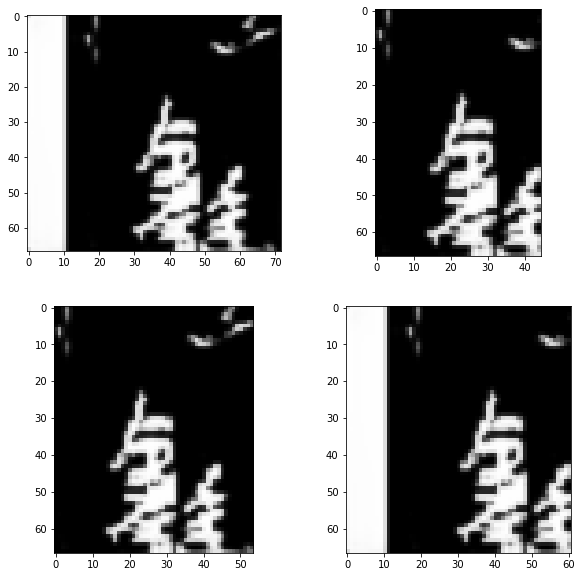

word            : 89 56666_毓.png
img size        : 68 67
split_by_black  : 1 11 60 67
split_by_contour: 3 0 59 65
crop area       : 3 11 59 65


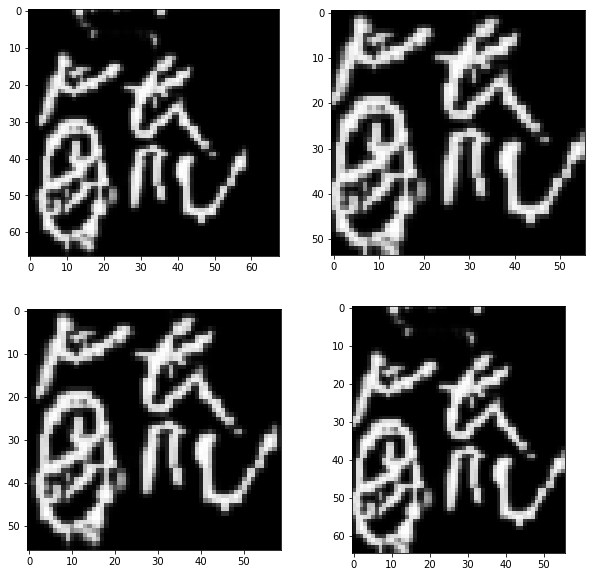

word            : 90 56687_柯.png
img size        : 77 67
split_by_black  : 13 14 75 67
split_by_contour: 6 0 74 65
crop area       : 13 14 74 65


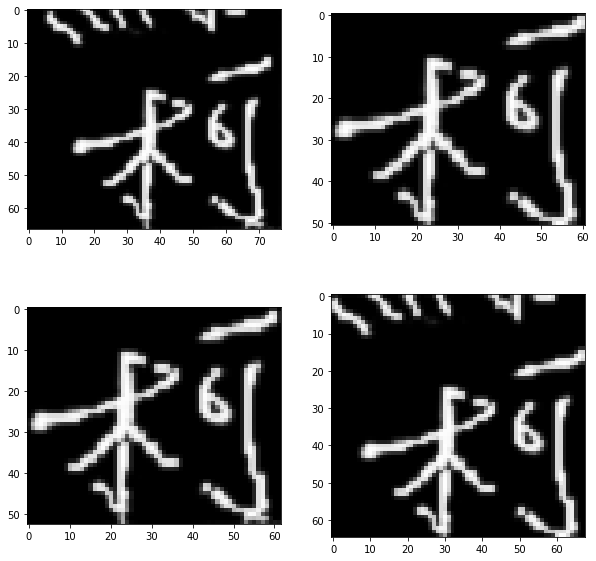

word            : 91 56707_芝.png
img size        : 60 67
split_by_black  : 9 0 45 60
split_by_contour: 12 3 41 59
crop area       : 12 3 41 59


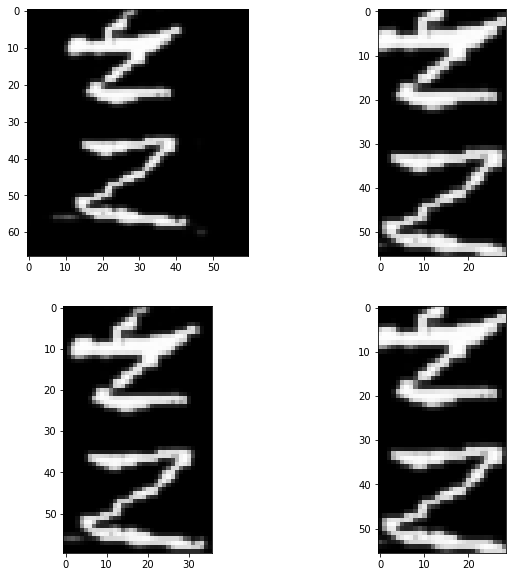

word            : 92 56714_寓.png
img size        : 48 67
split_by_black  : 0 0 36 65
split_by_contour: 0 0 33 63
crop area       : 0 0 33 63


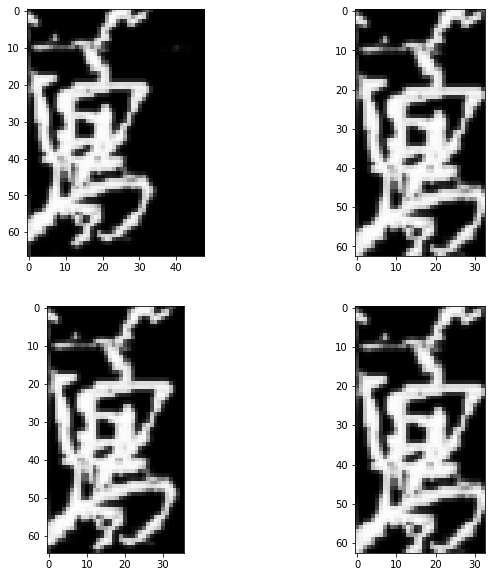

word            : 93 56715_淑.png
img size        : 79 67
split_by_black  : 12 15 75 67
split_by_contour: 13 0 77 67
crop area       : 13 15 75 67


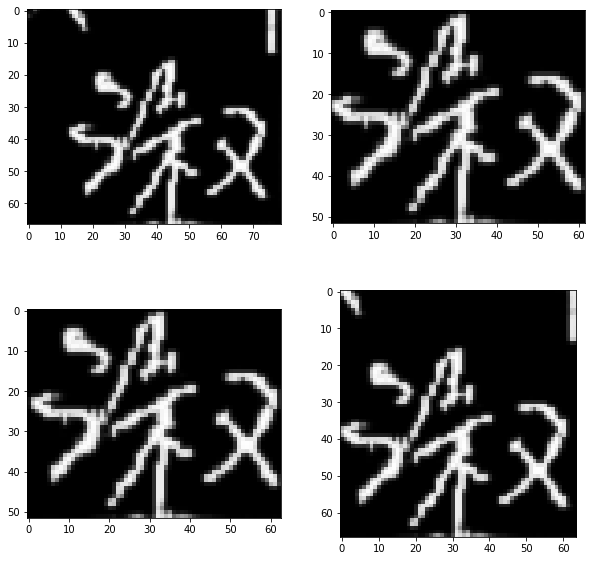

word            : 94 56716_格.png
img size        : 45 67
split_by_black  : 0 13 45 62
split_by_contour: 0 1 45 59
crop area       : 0 13 45 59


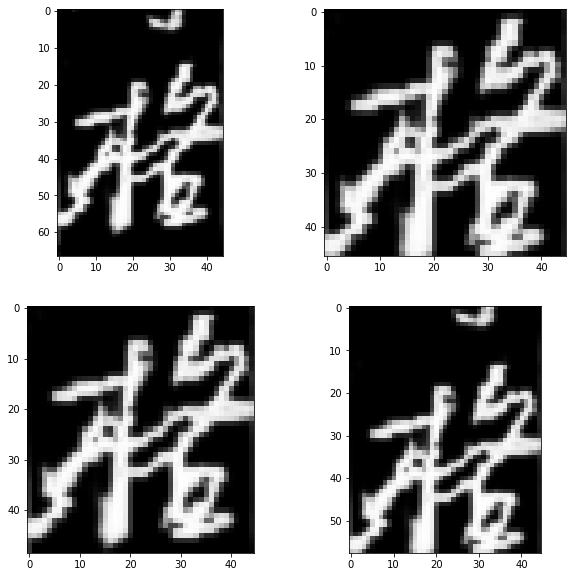

word            : 95 56722_皇.png
img size        : 42 67
split_by_black  : 3 0 36 65
split_by_contour: 5 0 33 62
crop area       : 5 0 33 62


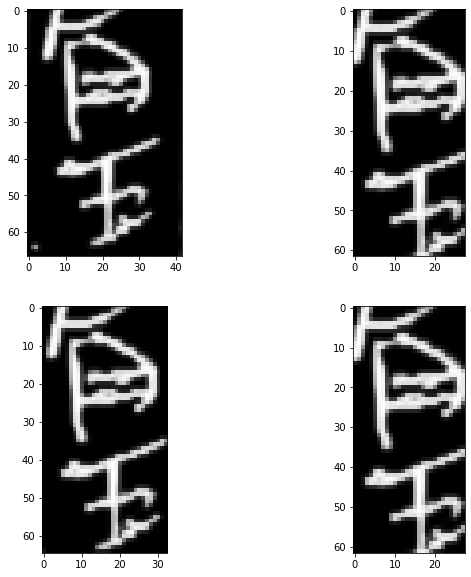

word            : 96 56727_紙.png
img size        : 47 67
split_by_black  : 4 16 45 60
split_by_contour: 10 29 44 59
crop area       : 10 29 44 59


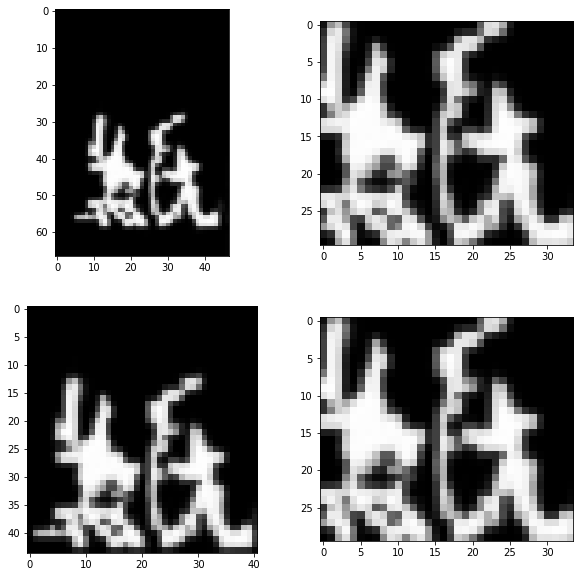

word            : 97 56741_維.png
img size        : 79 67
split_by_black  : 19 0 75 67
split_by_contour: 0 0 74 67
crop area       : 19 0 74 67


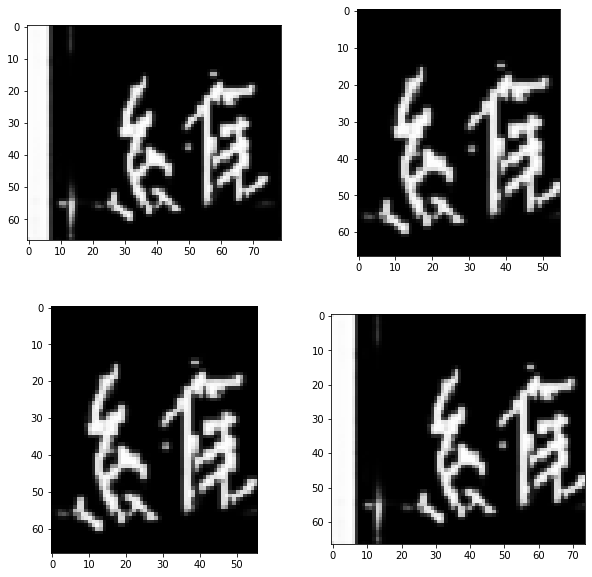

word            : 98 56749_瀚.png
img size        : 94 67
split_by_black  : 0 0 70 67
split_by_contour: 0 0 66 67
crop area       : 0 0 66 67


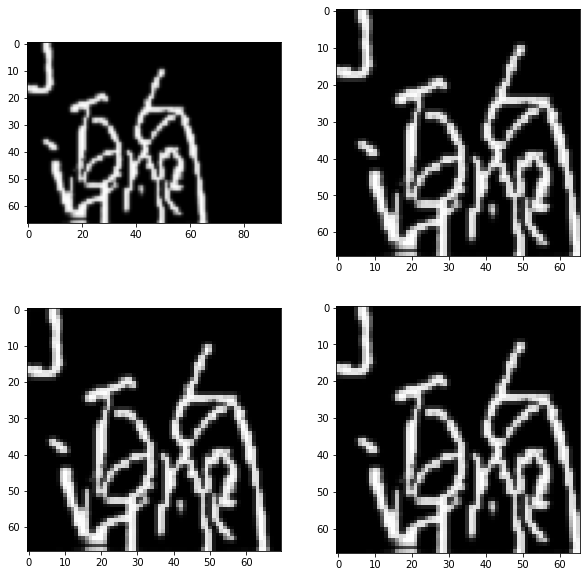

word            : 99 56754_郁.png
img size        : 52 67
split_by_black  : 2 0 52 67
split_by_contour: 4 0 50 67
crop area       : 4 0 50 67


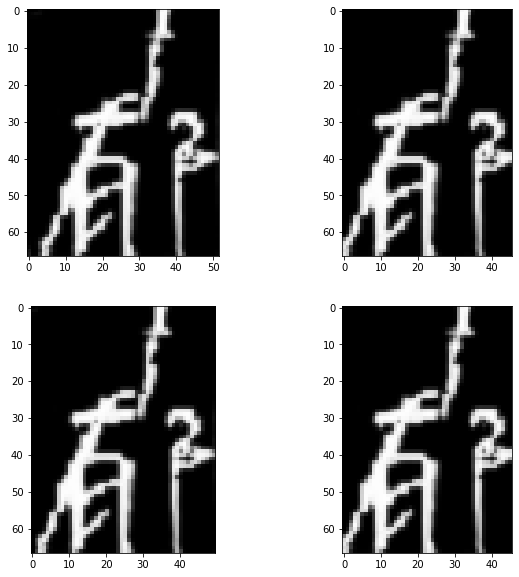

word            : 100 56755_范.png
img size        : 78 67
split_by_black  : 10 0 67 54
split_by_contour: 12 0 66 67
crop area       : 12 0 66 54


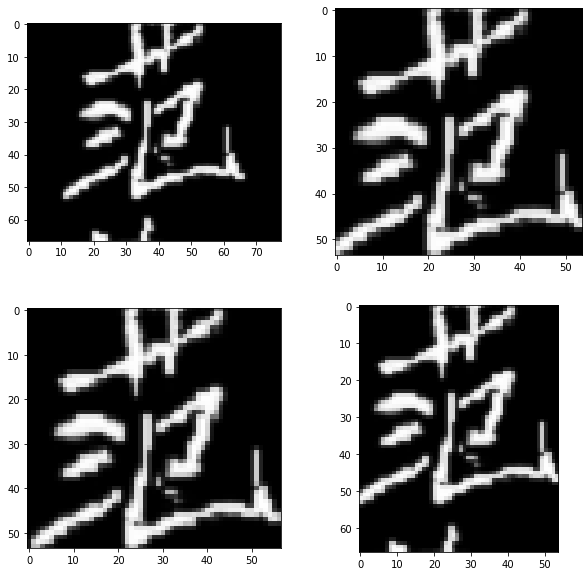

word            : 101 56757_鈺.png
img size        : 51 67
split_by_black  : 5 16 51 65
split_by_contour: 7 0 49 64
crop area       : 7 16 49 64


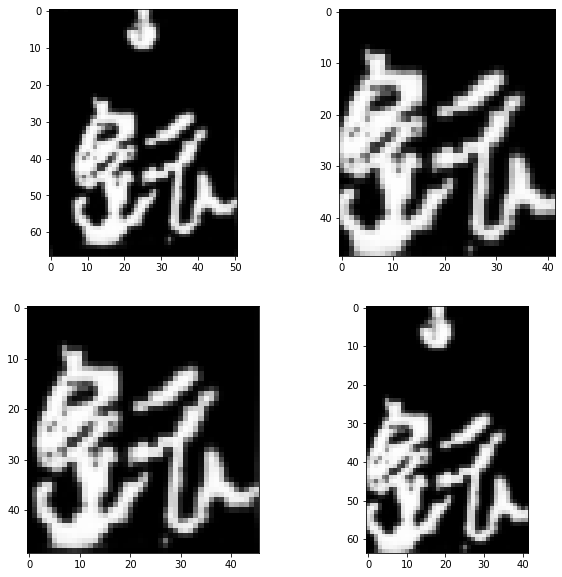

word            : 102 56763_弘.png
img size        : 44 67
split_by_black  : 8 12 44 55
split_by_contour: 9 15 41 67
crop area       : 9 15 41 55


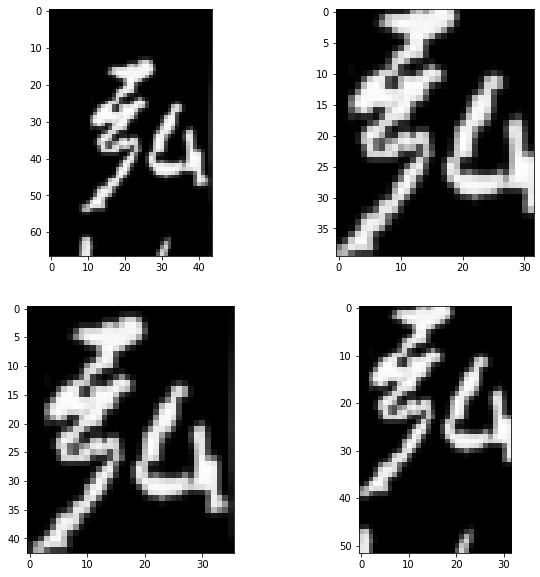

word            : 103 56768_妤.png
img size        : 82 67
split_by_black  : 9 0 61 67
split_by_contour: 11 0 55 67
crop area       : 11 0 55 67


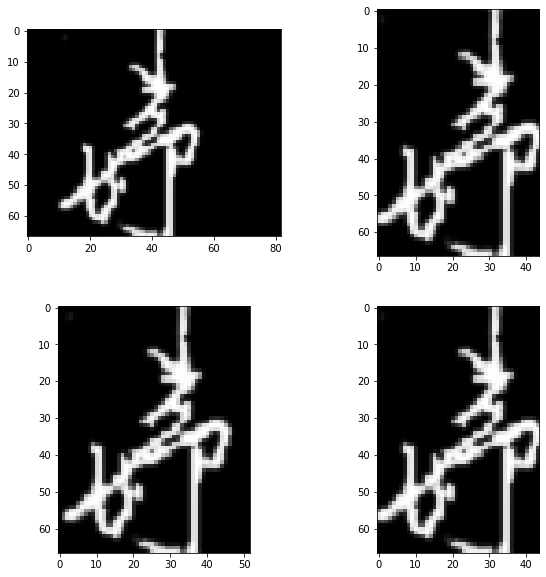

word            : 104 56771_機.png
img size        : 75 67
split_by_black  : 4 9 75 67
split_by_contour: 0 0 74 67
crop area       : 4 9 74 67


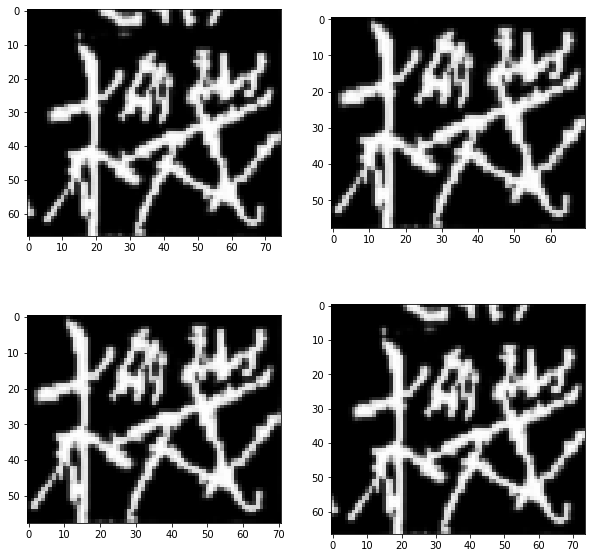

word            : 105 56787_翠.png
img size        : 51 67
split_by_black  : 0 5 49 67
split_by_contour: 1 0 48 67
crop area       : 1 5 48 67


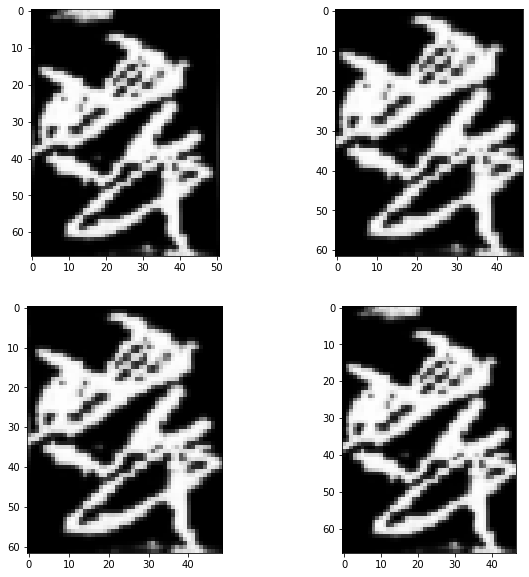

word            : 106 56801_紘.png
img size        : 43 67
split_by_black  : 6 16 43 67
split_by_contour: 8 2 43 67
crop area       : 8 16 43 67


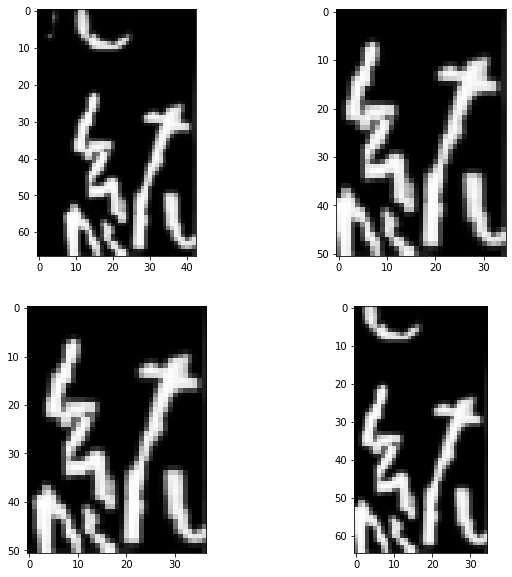

word            : 107 56802_珍.png
img size        : 69 67
split_by_black  : 3 1 53 67
split_by_contour: 5 4 52 67
crop area       : 5 4 52 67


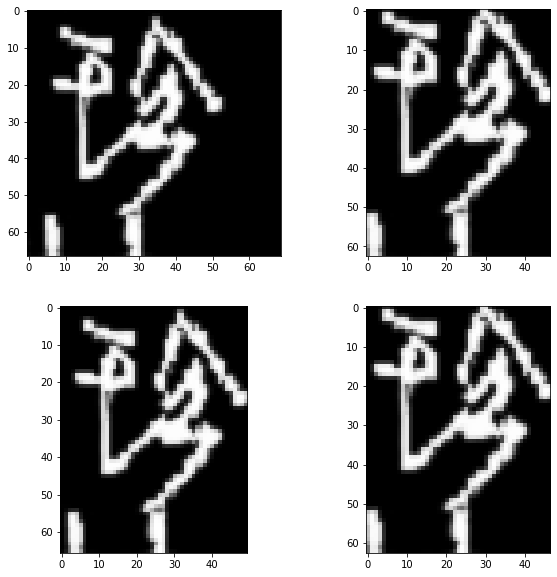

word            : 108 56804_洲.png
img size        : 54 67
split_by_black  : 8 4 51 67
split_by_contour: 12 6 50 67
crop area       : 12 6 50 67


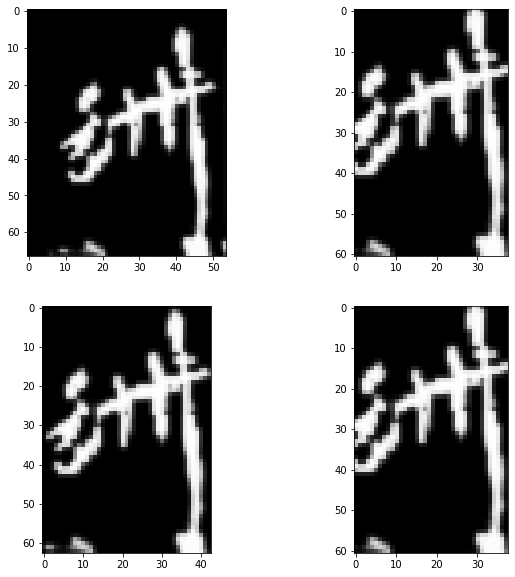

word            : 109 56808_哲.png
img size        : 49 67
split_by_black  : 2 15 36 67
split_by_contour: 4 17 34 67
crop area       : 4 17 34 67


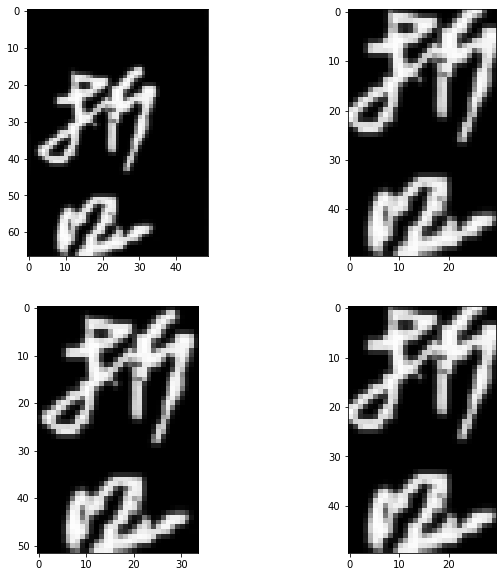

word            : 110 56812_祥.png
img size        : 72 67
split_by_black  : 3 6 59 67
split_by_contour: 5 8 58 67
crop area       : 5 8 58 67


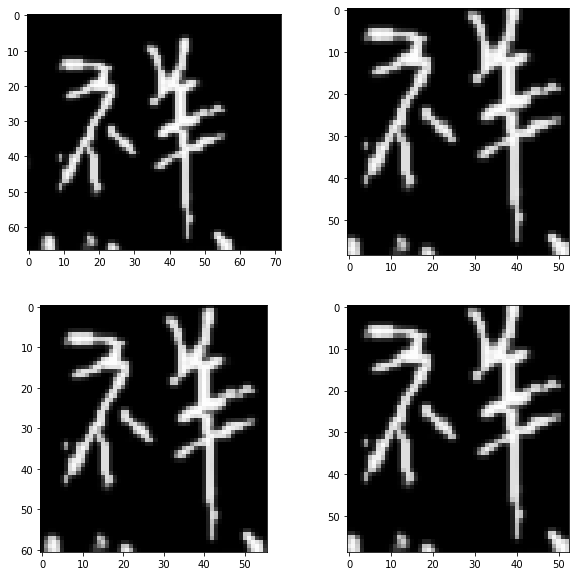

word            : 111 56831_彩.png
img size        : 58 67
split_by_black  : 14 15 58 67
split_by_contour: 23 18 58 65
crop area       : 23 18 58 65


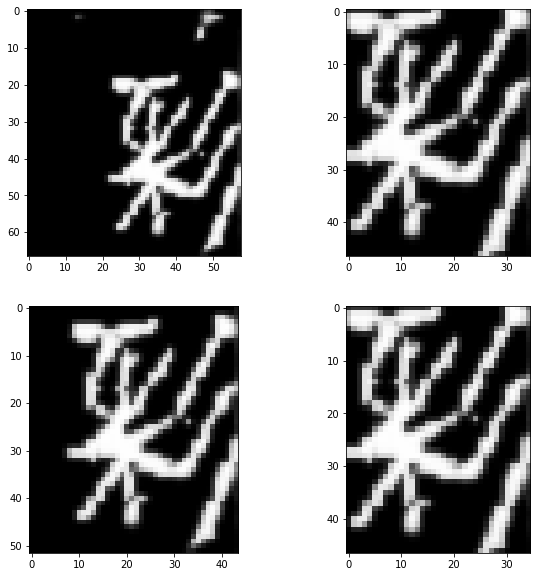

word            : 112 56843_允.png
img size        : 59 67
split_by_black  : 6 14 47 64
split_by_contour: 8 16 46 63
crop area       : 8 16 46 63


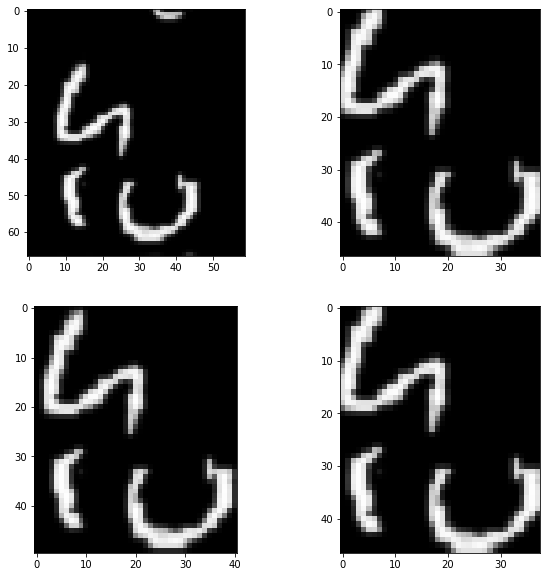

word            : 113 56900_清.png
img size        : 52 67
split_by_black  : 0 0 52 67
split_by_contour: 3 1 50 64
crop area       : 3 1 50 64


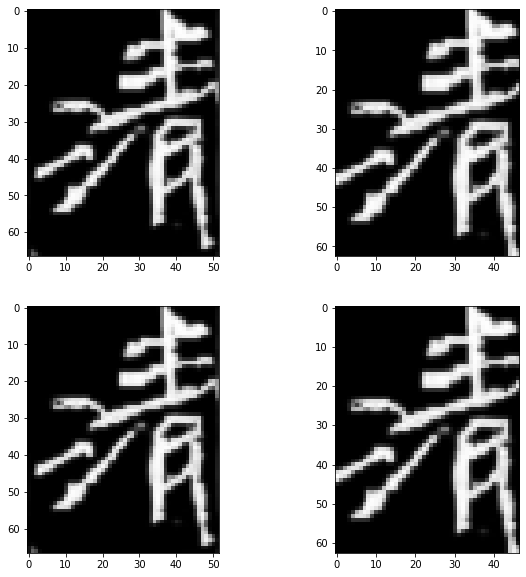

word            : 114 56902_清.png
img size        : 48 67
split_by_black  : 5 0 48 67
split_by_contour: 7 0 45 60
crop area       : 7 0 45 60


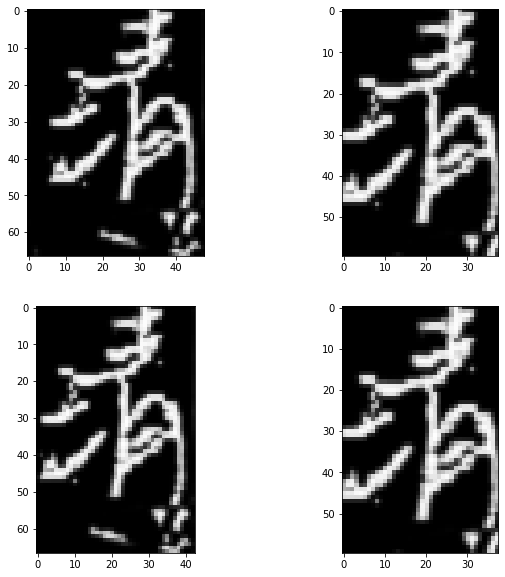

word            : 115 56903_霞.png
img size        : 93 67
split_by_black  : 2 2 69 56
split_by_contour: 4 4 72 67
crop area       : 4 4 69 56


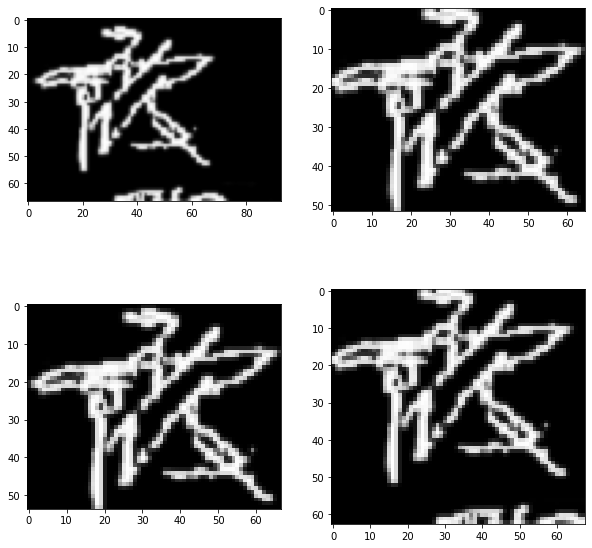

word            : 116 56910_梅.png
img size        : 77 67
split_by_black  : 3 7 57 52
split_by_contour: 6 8 61 67
crop area       : 6 8 57 52


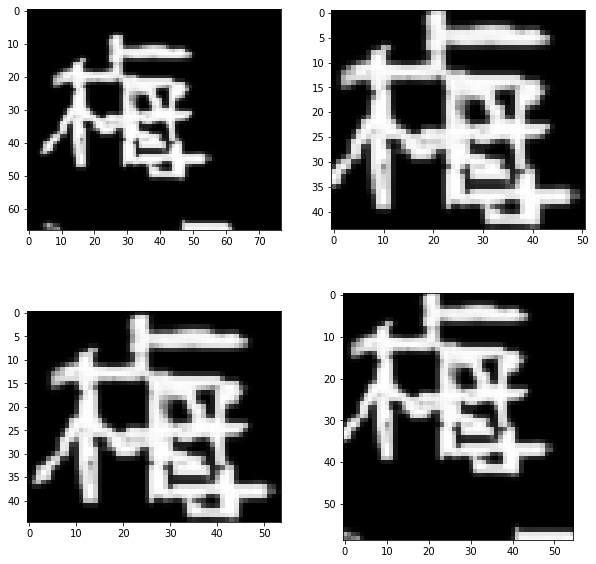

word            : 117 56911_婕.png
img size        : 83 67
split_by_black  : 9 15 66 67
split_by_contour: 11 0 65 67
crop area       : 11 15 65 67


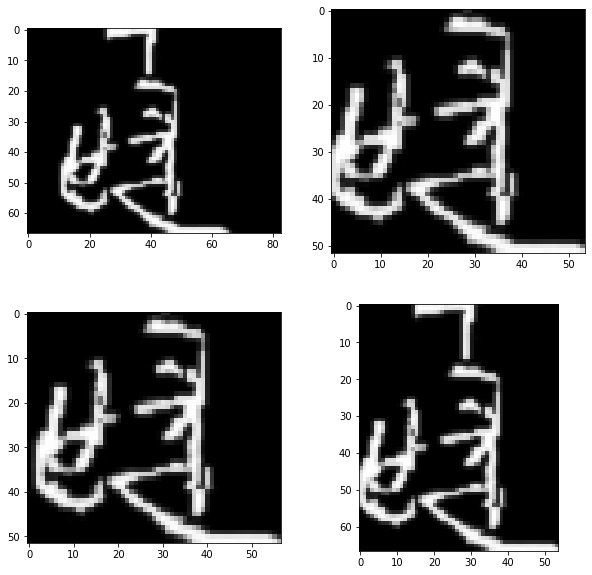

word            : 118 56921_店.png
img size        : 41 67
split_by_black  : 3 0 38 50
split_by_contour: 5 2 37 45
crop area       : 5 2 37 45


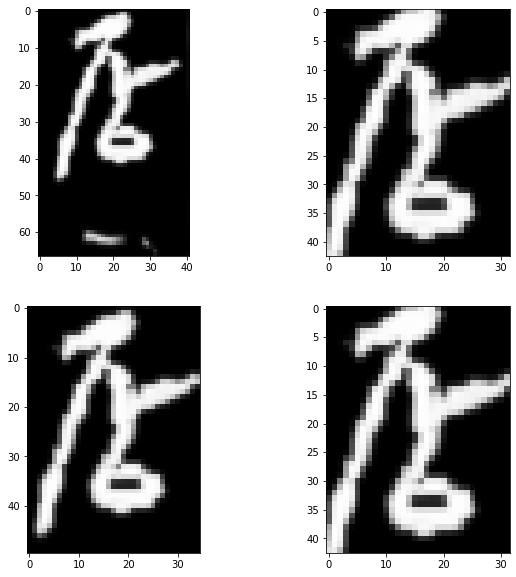

word            : 119 56925_杰.png
img size        : 54 67
split_by_black  : 1 0 42 67
split_by_contour: 3 0 41 67
crop area       : 3 0 41 67


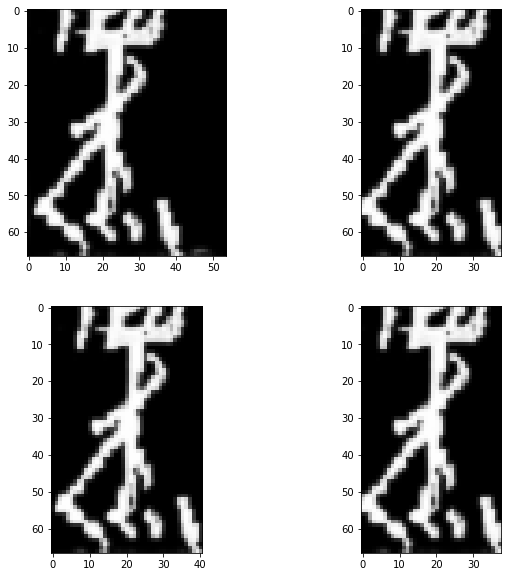

word            : 120 56927_壽.png
img size        : 53 67
split_by_black  : 4 13 50 67
split_by_contour: 9 0 48 67
crop area       : 9 13 48 67


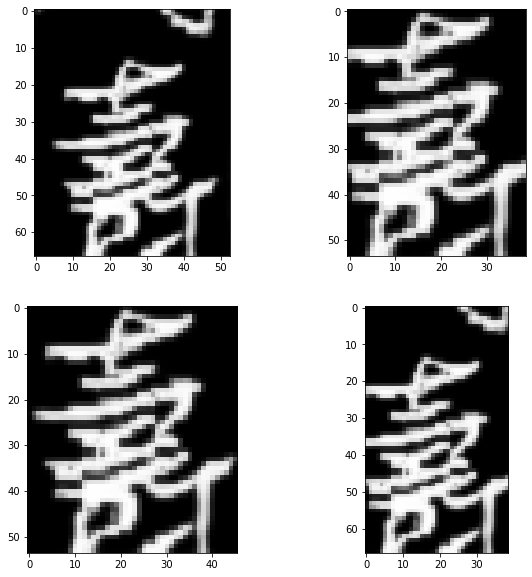

word            : 121 56940_謝.png
img size        : 66 67
split_by_black  : 9 13 66 67
split_by_contour: 2 0 64 67
crop area       : 9 13 64 67


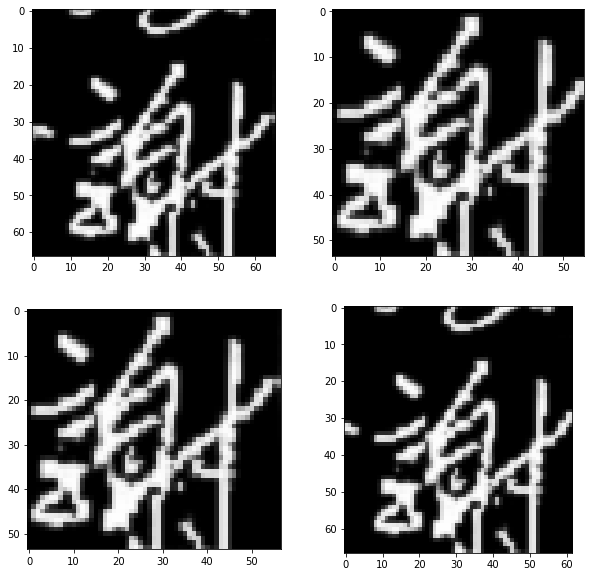

word            : 122 56942_靖.png
img size        : 52 67
split_by_black  : 0 13 52 67
split_by_contour: 0 0 50 67
crop area       : 0 13 50 67


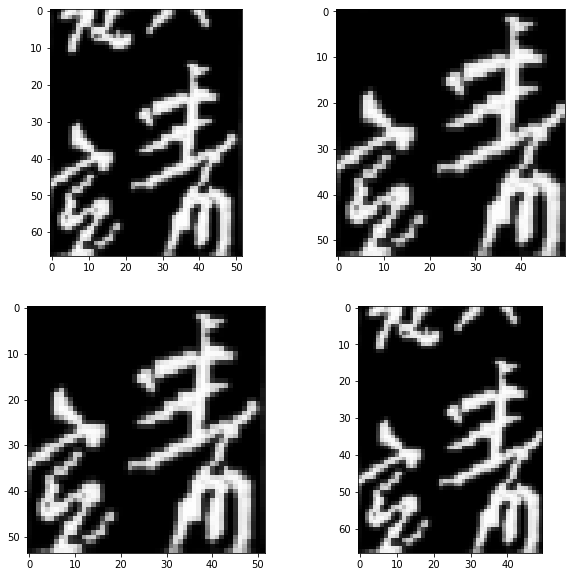

word            : 123 56955_青.png
img size        : 51 67
split_by_black  : 7 8 42 67
split_by_contour: 8 0 41 67
crop area       : 8 8 41 67


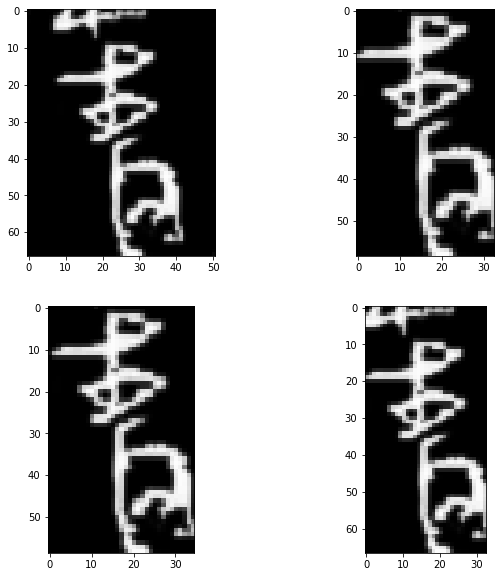

word            : 124 56963_具.png
img size        : 44 67
split_by_black  : 4 0 44 53
split_by_contour: 6 0 42 67
crop area       : 6 0 42 53


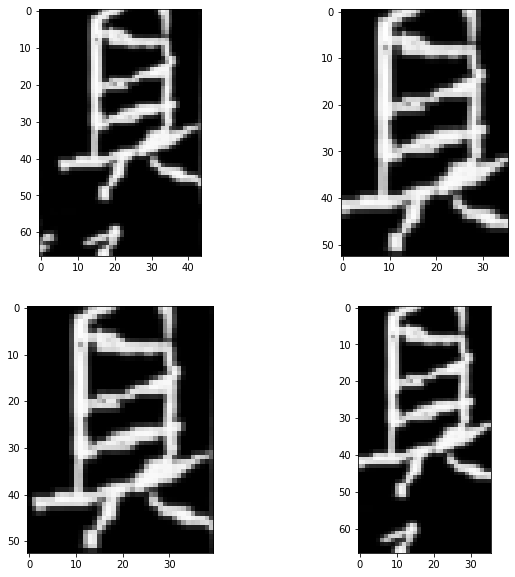

word            : 125 56980_仁.png
img size        : 38 67
split_by_black  : 2 14 35 58
split_by_contour: 6 19 31 48
crop area       : 6 19 31 48


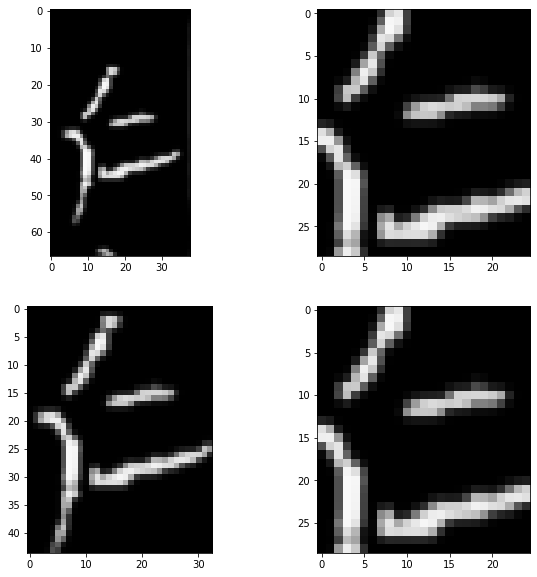

word            : 126 56985_格.png
img size        : 49 67
split_by_black  : 1 7 49 67
split_by_contour: 4 10 48 65
crop area       : 4 10 48 65


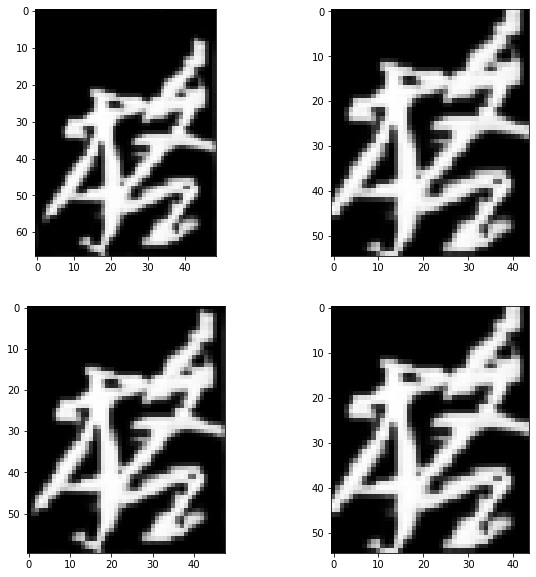

word            : 127 56992_曹.png
img size        : 60 67
split_by_black  : 15 16 54 67
split_by_contour: 22 0 53 67
crop area       : 22 16 53 67


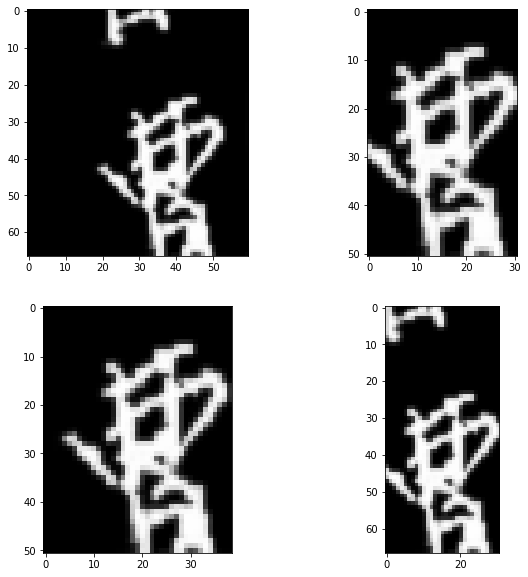

In [67]:
data_list=os.listdir(data_path)
len(data_list)
for num in range(len(data_list)):
    print("word            :", num, data_list[num])
    file_path = data_path+data_list[num]
    img = cv2_imread(file_path)

    left_x = [0,0]
    right_x = [0,0]
    top_y = [0,0]
    bot_y = [0,0]

    left_x[0], right_x[0], top_y[0], bot_y[0] = split_by_black(img)
    left_x[1], right_x[1], bot_y[1], top_y[1] = split_by_contour(img)
    print("img size        :", img.shape[1], img.shape[0])
    print("split_by_black  :",left_x[0], top_y[0], right_x[0], bot_y[0])
    
    print("split_by_contour:",left_x[1], top_y[1], right_x[1], bot_y[1])

    crop_x = max(left_x)
    crop_y = max(top_y)
    crop_w = min(right_x)
    crop_h = min(bot_y)
    print("crop area       :",crop_x, crop_y, crop_w, crop_h)

    plt.figure(figsize=(10, 10))        
    plt.subplot(2,2,1)
    plt.imshow(img)
    plt.subplot(2,2,2)
    plt.imshow(img[crop_y:crop_h,crop_x:crop_w,:])
    plt.subplot(2,2,3)
    plt.imshow(img[top_y[0]:bot_y[0],left_x[0]:right_x[0],:])
    plt.subplot(2,2,4)
    plt.imshow(img[top_y[1]:bot_y[1],left_x[1]:right_x[1],:])
    plt.show()